<h1 style="color:#3498DB;font-size:50px;font-family:Georgia;text-align:center;"><strong>EEET2485 - Research Methods for Engineers</strong></h1>
<h1 style="color:#3498DB;font-size:50px;font-family:Georgia;text-align:center;"><strong>Group Assignment</strong></h1>
<h2 style="color:#3498DB;font-size:50px;font-family:Georgia;text-align:center;"><strong>E-Scooter Stations Analysis</strong></h2>

### <b>Students:</b>
### <b>Tran Khai Minh (s3818343)</b>
### <b>Nguyen Huy Hoang (s3764704)</b>
### <b>Nguyen Nhat Tan (s3818559)</b>
### <b>Tong Son Tung (s3818153)</b>
### <b>Nguyen Thanh Loan (s3821185)</b>

### <b>Group Number: 2</b>

### <b>Assigned Dataset: 2</b>

### <b>Lecturer: Dr. Arthur Tang</b>

### <b>Due Date: January 13, 2023</b>


<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📜 Table of Content</strong></h1>

### [I. Data Preparation](#1)

[1.1 Introduction](#1.1) 

[1.2 Research Questions](#1.2)

[1.3 Importing neccessary libraries](#1.3)

[1.4 Importing the dataset](#1.4)

[1.5 Data information](#1.5)

<br>

### [II. Data Cleaning](#2)

[2.1 About this dataset](#2.1)

[2.2 Drop duplicate(s)](#2.2)

<br>

### [III. Exploratory data analysis (EDA)](#3)

[3.1 Outliers](#3.1)

> - 3.1.1 [Descriptive statistics for Central Tendency](#3.1.1) 
> - 3.1.2 [Detecting and Dealing with outliers](#3.1.2) 

[3.2 Analysis for Research Questions](#3.2)

> - [3.2.1 RQ1: Which weather factor(s) most likely affect the number of casual e-scooter rentees?](#3.2.1) 
> - [3.2.2 RQ2: Which weather factor(s) most likely affect the number of registered e-scooter rentees?](#3.2.2) 
> - [3.2.3 RQ3: Which weather factor(s) most likely affect the number of newly-registered e-scooter rentees?](#3.2.3) 
> - [3.2.4 RQ4, RQ5: Which season are people most/least likely to rent an e-scooter?](#3.2.4) 
> - [3.2.5 RQ6, RQ7: Which station has the most/least e-scooter rent in a single day?](#3.2.5) 


<br>

### [IV. References](#4)

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 1. Data Preparation</strong></h1>

<a id="1.1"></a>
# ️🎯 1.1 Introduction
****
<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black"> The world population has shown a considerable upward trend recently, so that the buying and selling an occupation has received a great academic attention. In this project, we have conducted research on a provided dataset which is about the “Room Occupancy Estimation” by Adarsh Pal Singh and Dr. Sachin Chaudhari.  We examined machine behavior pattern in numerous aspects using approaches and analytical tools provided in Pandas, including factor collaborations, data probability distributions, and room occupancy causes. Based on the defined aspects, we develop a list of research questions to investigate the nature of our dataset based on the mentioned features.</p>

<a id="1.2"></a>
# ️🎯 1.2 Research Questions (RQs)
****
> - ***RQ1: Which weather factor(s) most likely affect the number of casual e-scooter rentees?***

> - ***RQ2: Which weather factor(s) most likely affect the number of registered e-scooter rentees?***

> - ***RQ3: Which weather factor(s) most likely affect the number of newly-registered e-scooter rentees?***

> - ***RQ4: Which season are people most likely to rent an e-scooter?***
> - ***RQ5: Which season are people least likely to rent an e-scooter?***

> - ***RQ6: Which station has the most e-scooter rent in a single day?***
> - ***RQ7: Which station has the least e-scooter rent in a single day?***


<a id="1.3"></a>
# ✴️ 1.3 Importing neccessary libraries
****

In [1]:
# Turning off warninng
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [2]:
import sys
!{sys.executable} -m pip -q install missingno
!{sys.executable} -m pip -q install factor_analyzer
!{sys.executable} -m pip -q install pingouin
!{sys.executable} -m pip -q install researchpy

# import libraries which are pandas and numpy
import pandas as pd
import numpy as np
#This is is for Correlation test
from scipy.stats import pearsonr
#This is is for Mann-Whitney Testing
import scipy.stats as stats
# importing the chsq test
from scipy.stats import chi2_contingency
#This is for ANOVA test
from scipy.stats import f_oneway
from scipy.stats import levene
import researchpy as rp
import scipy.stats as stats
import statsmodels.stats.multicomp as mc
import pingouin as pg


#for plots
import matplotlib.pyplot as plt
#This is for setting the size of plots
plt.rcParams["figure.figsize"]= 15,10
from scipy import stats #This is for state model and ploting
import statsmodels.api as sm #This is for state model report


#Libraries for plotting
# Modules for data visualization
import seaborn as sns
import matplotlib.patches as mpatches
sns.set_theme(style="ticks", color_codes=True) #set theme in seaborn
# scatter matrix library
from pandas.plotting import scatter_matrix

import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning

## Check numpy and pandas version

In [3]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.21.5
Pandas version:  1.4.4
Python 3.9.13


### Discussion:
***
I want to check the numpy and pandas version since I want to make sure the verson is appropriate for my work load. Currently, it is still appropriate

<a id="1.4"></a>
# 📲 1.4 Importing the dataset
***

In [4]:
df = pd.read_excel("dataset2.xlsx")

df.columns = df.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(df.shape))

# drop Unnamed, it is just a number given to identify each house
df.head(3)

The shape of the ORGINAL data is (row, column): (8760, 15)


StationNumber                 Date  CasualUser  RegisteredUser  \
0              1  2017-01-12 00:00:00        80.0             254   
1              2  2017-01-12 00:00:00        79.0             204   
2              3  2017-01-12 00:00:00        81.0             173   

   Newregistereduser  Temperature(°C)  Humidity(%)  Windspeed(m/s)  \
0                  5             -5.2           37             2.2   
1                  6             -5.5           38             0.8   
2                  8             -6.0           39             1.0   

   Visibility(10m)  Dewpointtemperature(°C)  SolarRadiation(MJ/m2)  \
0             2000                    -17.6                    0.0   
1             2000                    -17.6                    0.0   
2             2000                    -17.7                    0.0   

   Rainfall(mm)  Snowfall(cm) Seasons OperationDay  
0           0.0           0.0  Winter          Yes  
1           0.0           0.0  Winter          Yes  
2           0.0           0.0  Winter          Yes

<a id="1.5"></a>
# 🔈 1.5 Data Information
****
I want to have an overall look on both of the train and test dataset, so I use .shape and .info() function in python to do that.

In [5]:
print ("The shape of the train data is (row, column):"+ str(df.shape))
print (df.info())

The shape of the train data is (row, column):(8760, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   StationNumber            8760 non-null   int64  
 1   Date                     8760 non-null   object 
 2   CasualUser               8760 non-null   float64
 3   RegisteredUser           8760 non-null   int64  
 4   Newregistereduser        8760 non-null   int64  
 5   Temperature(°C)          8760 non-null   float64
 6   Humidity(%)              8760 non-null   int64  
 7   Windspeed(m/s)           8760 non-null   float64
 8   Visibility(10m)          8760 non-null   int64  
 9   Dewpointtemperature(°C)  8760 non-null   float64
 10  SolarRadiation(MJ/m2)    8760 non-null   float64
 11  Rainfall(mm)             8760 non-null   float64
 12  Snowfall(cm)             8760 non-null   float64
 13  Seasons               

### Discussion:
***
From this, the information that I gained from the train dataset are the total record is 8760 with no missing and it has 15 columns with the target variable `OperationDay`.

<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🧹 2. Data Cleaning</strong></h1>

<a id="2.1"></a>
# 🦄 2.1 About This Dataset
***
Let's investigate the datatype of the dataset a little bit.
***
**Categorical:**    
- **Nominal** (variables that have two or more categories, but which do not have an intrinsic order.)
 >  - **Seasons**: The current season on the day of the record
 >  - **OperationDay**: Whether the station is open on the day of the record

***
**Numeric:**
- **Continuous**
    >  - **Temperature(°C)**: Average temperature at the station on the day of the record
    >  - **Humidity(%)**: Average humidity at the station on the day of the record
    >  - **Windspeed(m/s)**: Average wind speed at the station on the day of the record
    >  - **Visibility(10m)**: Average visibility at the station on the day of the record
    >  - **Dewpointtemperature**: Average dew point temperature at the station on the day of the record
    >  - **SolarRadiation(MJ/m2)**: Average solar radiation at the station on the day of the record
    >  - **Rainfall(mm)**: Average rainfall rate at the station on the day of the record
    >  - **Snowfall(cm)**: Average snowfall rate at the station on the day of the record
  

<a id="2.2"></a>
# 🦄 2.2 Drop duplicate
***
Firstly, any duplicated entry should be dropped.

In [6]:
print ("The shape of the dataset before dropping duplicate entries:"+ str(df.shape))

df = df.drop_duplicates()

print ("The shape of the dataset after dropping duplicate entries:"+ str(df.shape))

The shape of the dataset before dropping duplicate entries:(8760, 15)
The shape of the dataset after dropping duplicate entries:(8760, 15)


### Discussion:
***
There is no duplicate entry in this dataset.

<a id="3"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📊 3. Data Exploration </strong></h1>

****

<a id="3.1"></a>
# 3.1 Outliers
****
## Detect and Dropping regulation: 
For the outliers, I want to detect them first. There are 2 scenarios which is the percentage of outliers is less than and equal 6 or the outliers is over 6 percent. For the percentage of outliers which is equal or less than 6, I will drop them since it does not effect much to our data, however, if the percentage of outliers is higher than 6 then I will investigate more. In case, all of the outliers have at least 1 person in that room, I do not drop it, since it indicate that in the "extreme" condition, that room have at least one people. In the scenario that there is just about less than 20 percent of the outliers have at least 1 people in the room, then I will drop that outliers since those outliers are just the noise data, which cause bias for the later model. Lastly, if there is more than 60 percent of outliers have at least one people in the room, then I will just drop the noise that do not have anyone in room. 
*****
## Outliers Dealing Method: 
I will deal outliers with box plot and IQR-distance from Median. The Z-Score, Quantile Filter, and IQR-distance from Median are three common methods for dealing with outliers. The Z-Score is used to calculate the mean and standard deviation. As a result, the evaluation of outliers may be skewed. The Quantile Filter is a superior strategy, however it can remove some of the parts that aren't outliers, resulting in a significant quantity of good data being lost while the outliers remain.

The minimum is known as Q0, the lower quartile is known as Q1, the median is known as Q2, the upper quartile is known as Q3, and the maximum is known as Q4. Q1, Q2, and Q3 mean:
> - Q1: greater than one-quarter of the data
> -Q2: greater than two-quarters of the data.
> -Q3: more than three-quarters of the data.

The InterQuatile Range, or IQR, is what is measured when the spread is measured. The IQR shows how evenly distributed the middle half of the data is. As a result of measuring IQR, values that are far from the center are identified and labeled as outliers.)

<a id="3.1.1"></a>
## 3.1.1 Descriptive statistics for Central Tendency

In [7]:
# see the static of all numerical column
df.describe().T

count         mean         std   min     25%  \
StationNumber            8760.0    12.500000    6.922582   1.0    6.75   
CasualUser               8760.0   279.777523  266.546813   0.0   69.00   
RegisteredUser           8760.0   704.602055  644.997468   0.0  191.00   
Newregistereduser        8760.0    22.454566   22.155487   0.0    5.00   
Temperature(°C)          8760.0    12.993653   12.271382 -17.8    3.50   
Humidity(%)              8760.0    58.226256   20.362413   0.0   42.00   
Windspeed(m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility(10m)          8760.0  1436.825799  608.298712  27.0  940.00   
Dewpointtemperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
SolarRadiation(MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)             8760.0     0.148687    1.128193   0.0    0.00   
Snowfall(cm)             8760.0     0.075068    0.436746   0.0    0.00   

                             50%      75%      max  
StationNumber              12.50    18.25    24.00  
CasualUser                195.00   424.00  1599.00  
RegisteredUser            504.50  1065.25  3556.00  
Newregistereduser          15.00    34.00   159.00  
Temperature(°C)            13.80    22.60   124.00  
Humidity(%)                57.00    74.00    98.00  
Windspeed(m/s)              1.50     2.30     7.40  
Visibility(10m)          1698.00  2000.00  2000.00  
Dewpointtemperature(°C)     5.10    14.80    27.20  
SolarRadiation(MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                0.00     0.00    35.00  
Snowfall(cm)                0.00     0.00     8.80

<AxesSubplot:>

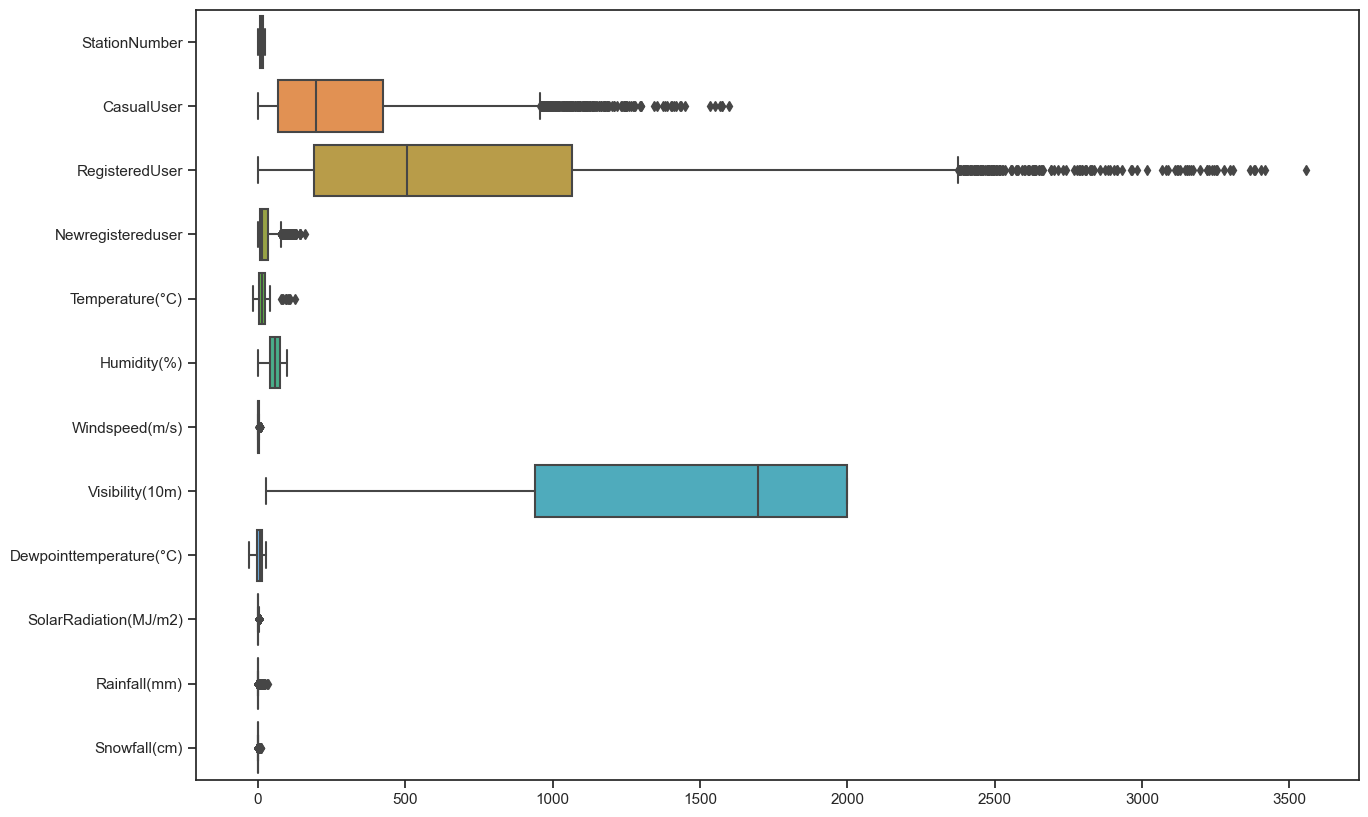

In [8]:
# plot the boxplot to see the outlier of each numerical column
plt.figure(figsize= (15,10))
sns.boxplot(data=df,orient="h")

### ---------> OBSERVATION
> There are some unrealistic values in `Temperature` and `Humidity`. I want to explore it first.

## Temperature

### Interquartile Range

In [9]:
# calculate the q1 and q3 and then the iqr
q1_Temperature = df['Temperature(°C)'].quantile(.25)
q3_Temperature = df['Temperature(°C)'].quantile(.75)
iqr_Temperature = q3_Temperature - q1_Temperature

print("q1_Temperature:", q1_Temperature, "\n")
print("q3_Temperature:", q3_Temperature, "\n")
print("iqr_Temperature:", iqr_Temperature)

q1_Temperature: 3.5 

q3_Temperature: 22.6 

iqr_Temperature: 19.1


### Descriptive statistics for Variability

In [10]:
# look at the Temperature mean
Temperature_mean = df['Temperature(°C)'].mean()
print("Temperature_mean:", Temperature_mean)
# look at the Temperature median
Temperature_median = df['Temperature(°C)'].median()
print("Temperature_median:", Temperature_median)
# look at the Temperature mode
Temperature_mode = df['Temperature(°C)'].mode().values[0]
print("Temperature_mode:", Temperature_mode)

Temperature_mean: 12.99365296803654
Temperature_median: 13.8
Temperature_mode: 19.1


(0.0, 550.0)

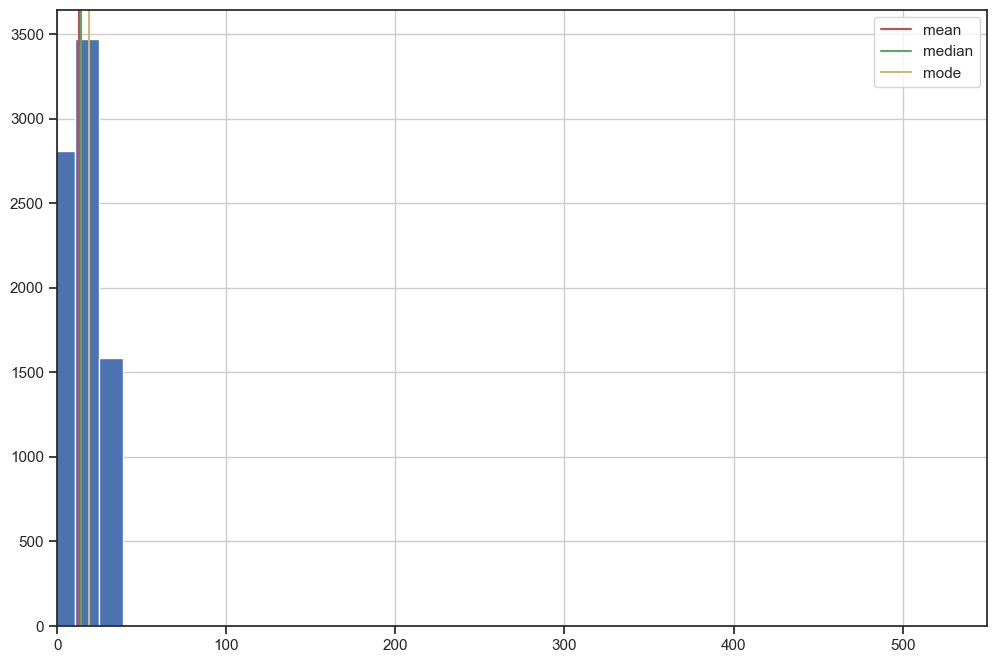

In [11]:
# plot the histogram with mean, median, and mode included
plt.figure(figsize=(12, 8))

df['Temperature(°C)'].hist()

plt.axvline(Temperature_mean, color='r', label='mean')
plt.axvline(Temperature_median, color='g', label='median')
plt.axvline(Temperature_mode, color='y', label='mode')

plt.legend()

# plt.ylim(0,50000)
plt.xlim(0,550)

### Discussion:
> - The mean lower than the median indicates that the data is skewed to the right.
> - Moreover, it is impossible for the `Temperature(°C)` to have the value is higher than the world highest record for Temperature [[1](#Link1)]. Therefore, there are outliers in this features.

## Humidity
*****
### Interquartile Range

In [12]:
# calculate the q1 and q3 and then the iqr
q1_Humidity = df['Humidity(%)'].quantile(.25)
q3_Humidity = df['Humidity(%)'].quantile(.75)
iqr_Humidity = q3_Humidity - q1_Humidity

print("q1_Humidity:", q1_Humidity, "\n")
print("q3_Humidity:", q3_Humidity, "\n")
print("iqr_Humidity:", iqr_Humidity)

q1_Humidity: 42.0 

q3_Humidity: 74.0 

iqr_Humidity: 32.0


### Descriptive statistics for Variability

In [13]:
# look at the Humidity mean
Humidity_mean = df['Humidity(%)'].mean()
print("Humidity_mean:", Humidity_mean)
# look at the Humidity median
Humidity_median = df['Humidity(%)'].median()
print("Humidity_median:", Humidity_median)
# look at the Humidity mode
Humidity_mode = df['Humidity(%)'].mode().values[0]
print("Humidity_mode:", Humidity_mode)

Humidity_mean: 58.226255707762554
Humidity_median: 57.0
Humidity_mode: 53


(0.0, 550.0)

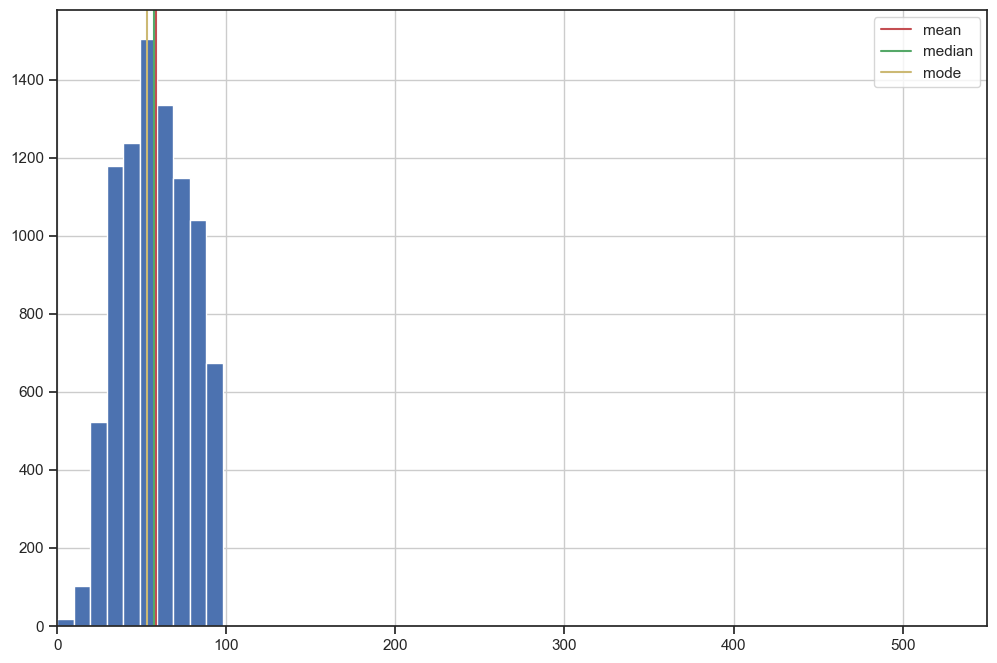

In [14]:
# plot the histogram with mean, median, and mode included
plt.figure(figsize=(12, 8))

df['Humidity(%)'].hist()

plt.axvline(Humidity_mean, color='r', label='mean')
plt.axvline(Humidity_median, color='g', label='median')
plt.axvline(Humidity_mode, color='y', label='mode')

plt.legend()

# plt.ylim(0,50000)
plt.xlim(0,550)

### Discussion:
****
> - The mean larger than the median indicates that the data is skewed to the left.
> - Moreover, it is impossible for the `Humidity(%)` to have the value is higher than the world highest record for Humidity [[2](#Link2)]. Therefore, there are outliers in this features.

<a id="3.1.2"></a>
## 3.1.2 Detecting and Dealing with outliers

In [15]:
def detect_outliers_IQR(df):
   #Calculate the Q1:
   Q1 = np.percentile(df, 25)
   #Calculate the Q3:
   Q3 = np.percentile(df, 75)
   #Calculate the IQR:
   IQR=Q3-Q1
   # Upper bound
   upper = np.where(df >= (Q3+1.5*IQR))
   # Lower bound
   lower = np.where(df <= (Q1-1.5*IQR))
   #Outliers
   outliers = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
   return outliers, upper, lower

> **`Temperature(°C)` column**

<AxesSubplot:>

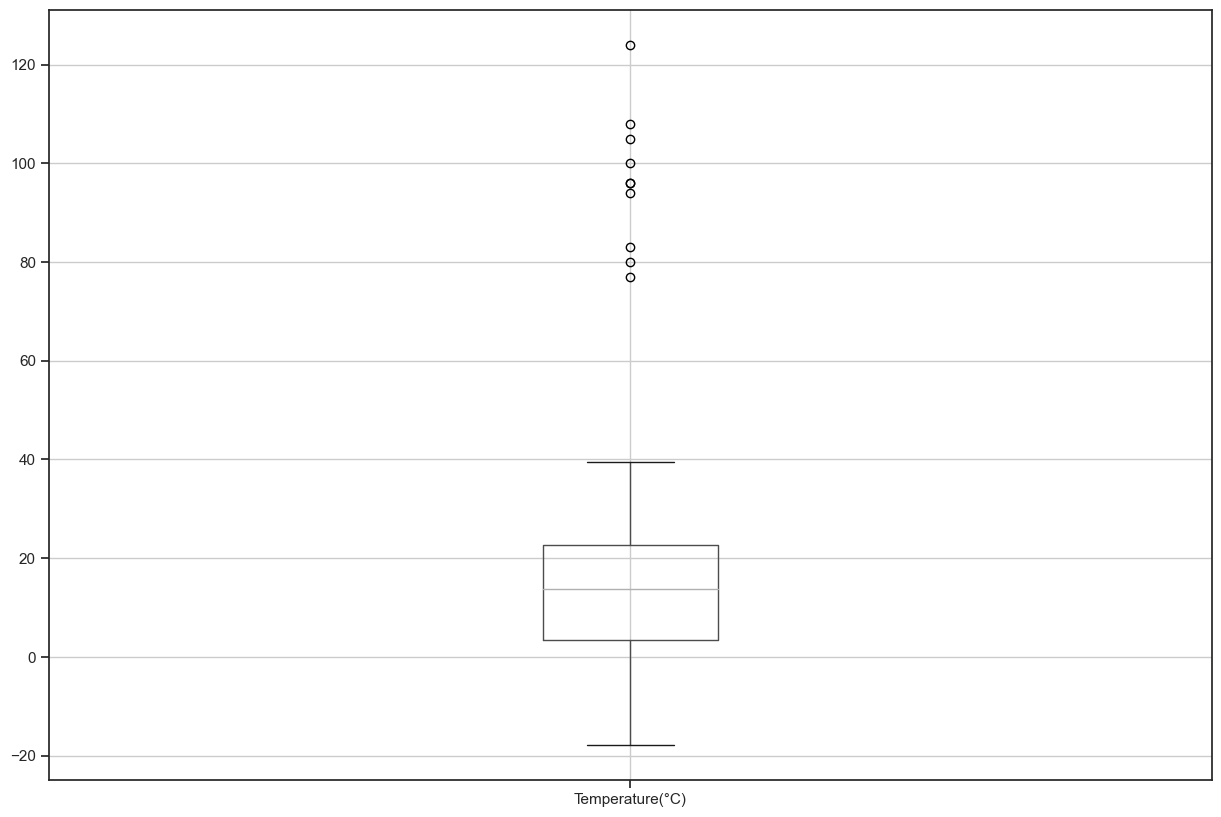

In [16]:
plt.figure(figsize= (15,10))

df.boxplot(column= "Temperature(°C)")

In [17]:
outliers, upper, lower = detect_outliers_IQR(df['Temperature(°C)'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))


number of outliers: 10
max outlier value: 124.0
min of outliers: 77.0
Percentage of outliers: 0.1141552511415525


### Discussion:
****
The percentage of outliers in `Temperature(°C)` is extremely small so that I want to drop them since those values of are impossible

In [18]:
df.drop(upper[0], inplace = True)

> **`Humidity(%)` column**

<AxesSubplot:>

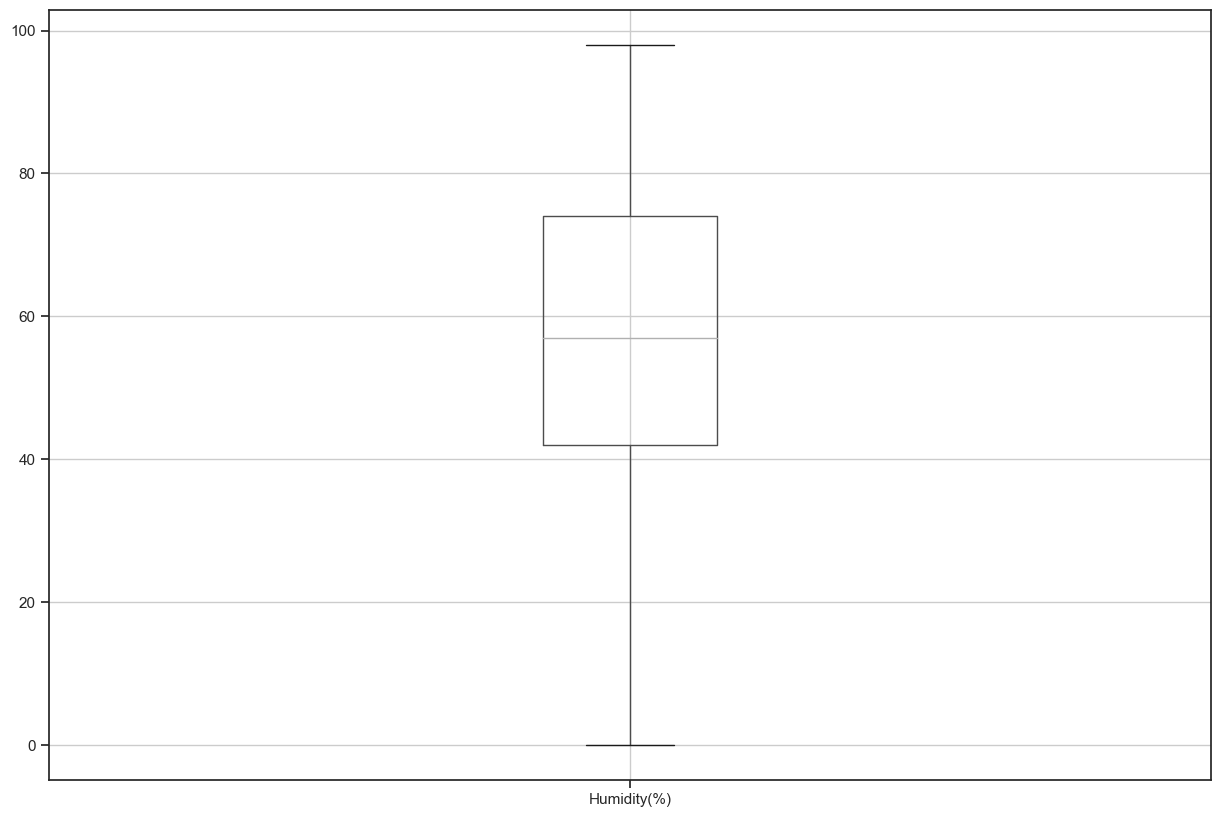

In [19]:
plt.figure(figsize= (15,10))

df.boxplot(column= "Humidity(%)")

In [20]:
outliers, upper, lower = detect_outliers_IQR(df['Humidity(%)'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))


number of outliers: 0
max outlier value: nan
min of outliers: nan
Percentage of outliers: 0.0


### Discussion:
****
Although `Humidity` have some values that might seem to be impossible, but there is no outliers

<a id="3.2"></a>
## 3.2 Analysis for Research Questions
****

<a id="3.2.1"></a>
### 3.2.1 RQ1. Which weather factor(s) most likely affect the number of casual e-scooter rentees?
****

### Correlation between `Temperature` and `Casual User`?
*****
**Hypotheses:**:
> * **Null hypothesis ($H_0$)** : `Temperature` and `CasualUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Temperature` and `CasualUser`  are correlated.

**Significance level** = 0.05

In [21]:
pearsonr(df['CasualUser'], df['Temperature(°C)'])

PearsonRResult(statistic=0.5361225500651723, pvalue=0.0)

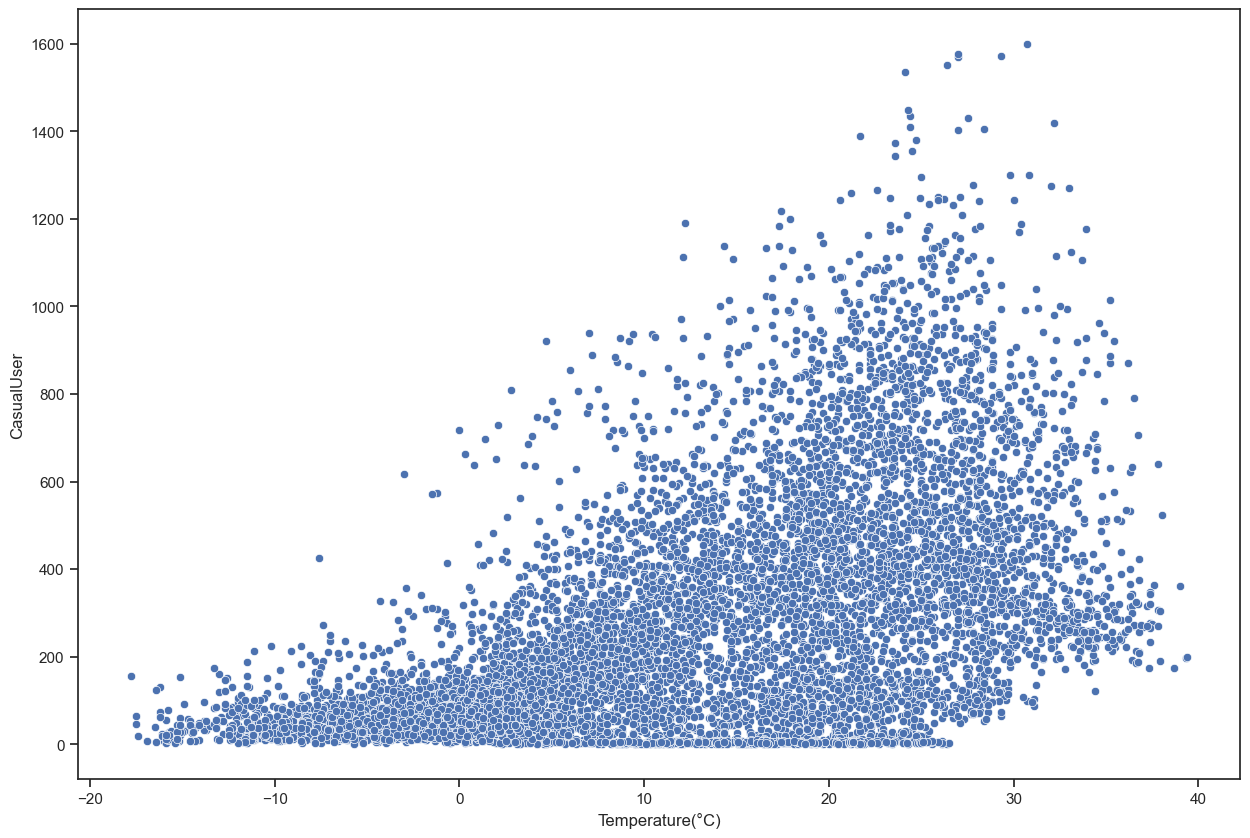

In [22]:
sns.scatterplot(x="Temperature(°C)", y="CasualUser", data=df);

### Discussion:
****
`Temperature` and `CasualUser` have a strong positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therfore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is high: 0.536.

### Correlation between `Humidity` and `CasualUser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Humidity` and `CasualUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Humidity` and `CasualUser` are correlated.

**Significance level** = 0.05

In [23]:
pearsonr(df['CasualUser'], df['Humidity(%)'])

PearsonRResult(statistic=-0.19217311319344724, pvalue=1.460343470059852e-73)

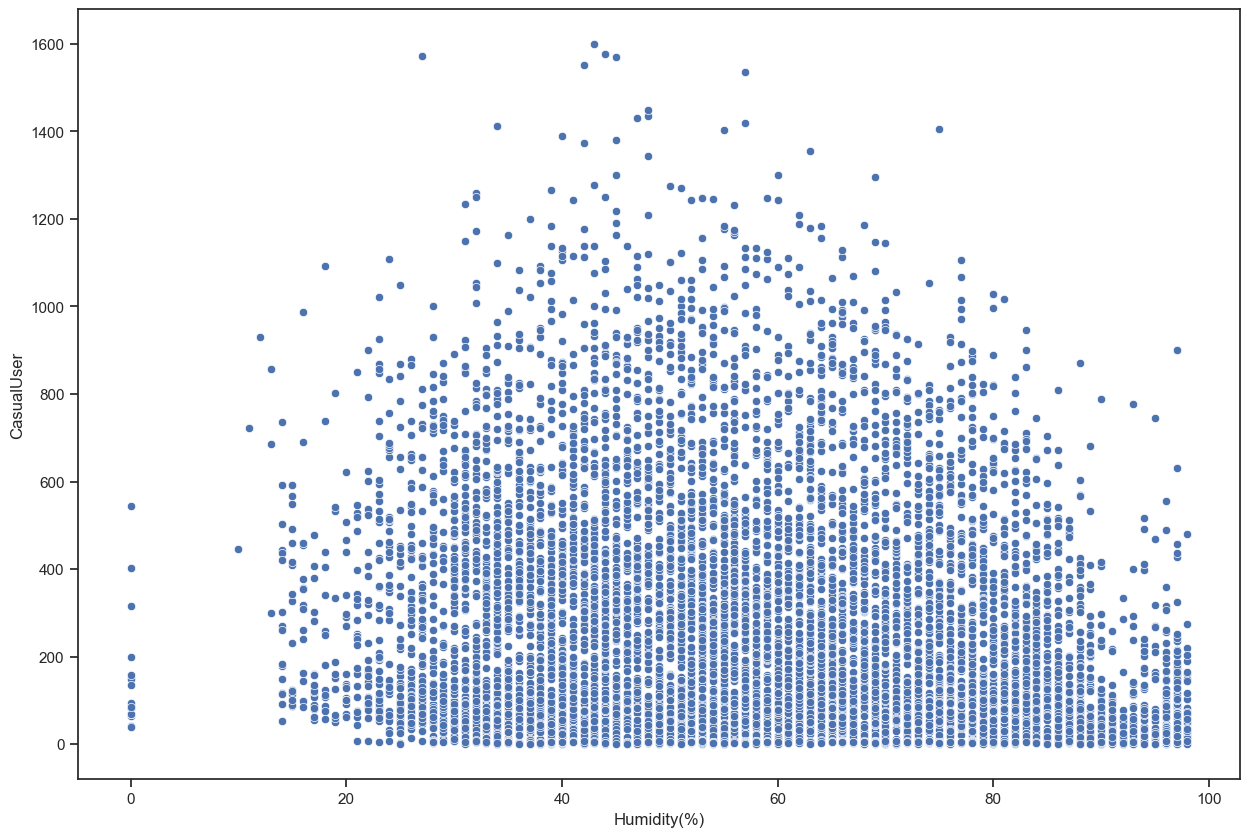

In [24]:
sns.scatterplot(x="Humidity(%)", y="CasualUser", data=df);

### Discussion:
****
`Humidity` and `CasualUser` have a weak negative correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: -0.192.

### Correlation between `Windspeed` and `CasualUser`?
*****
**Hypotheses**:
> * **Null hypothesis ($H_0$)** : `Windspeed` and `CasualUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Windspeed` and `CasualUser` are correlated.

**Significance level** = 0.05

In [25]:
pearsonr(df['CasualUser'], df['Windspeed(m/s)'])

PearsonRResult(statistic=0.11771591540726364, pvalue=2.237229528644659e-28)

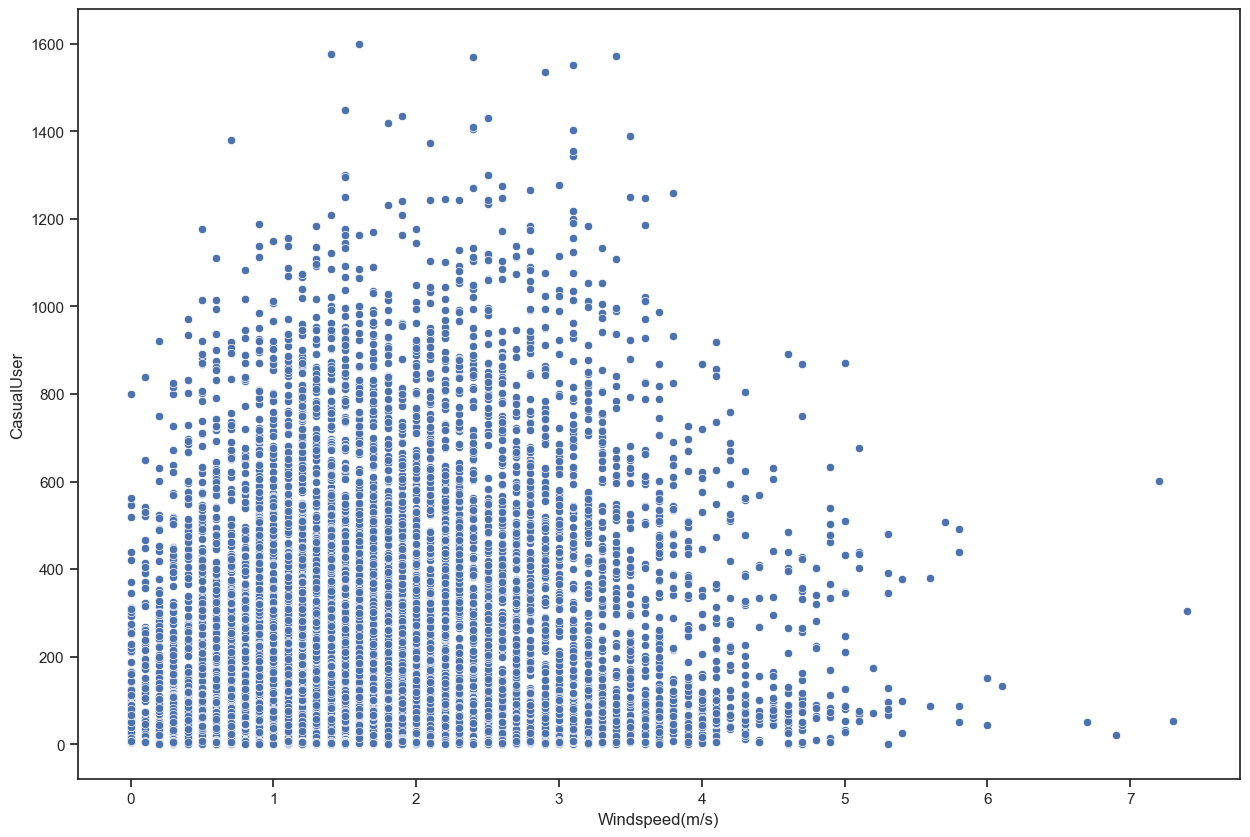

In [26]:
sns.scatterplot(x="Windspeed(m/s)", y="CasualUser", data=df);

### Discussion:
****
`Windspeed` and `CasualUser` have a weak positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: 0.118.

### Correlation between `Visibility` and `CasualUser`?
*****
**Hypotheses:**:
> * **Null hypothesis ($H_0$)** : `Visibility` and `CasualUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Visibility` and `CasualUser` are correlated.

**Significance level** = 0.05

In [27]:
pearsonr(df['CasualUser'], df['Visibility(10m)'])

PearsonRResult(statistic=0.18953826623021935, pvalue=1.4228848716200423e-71)

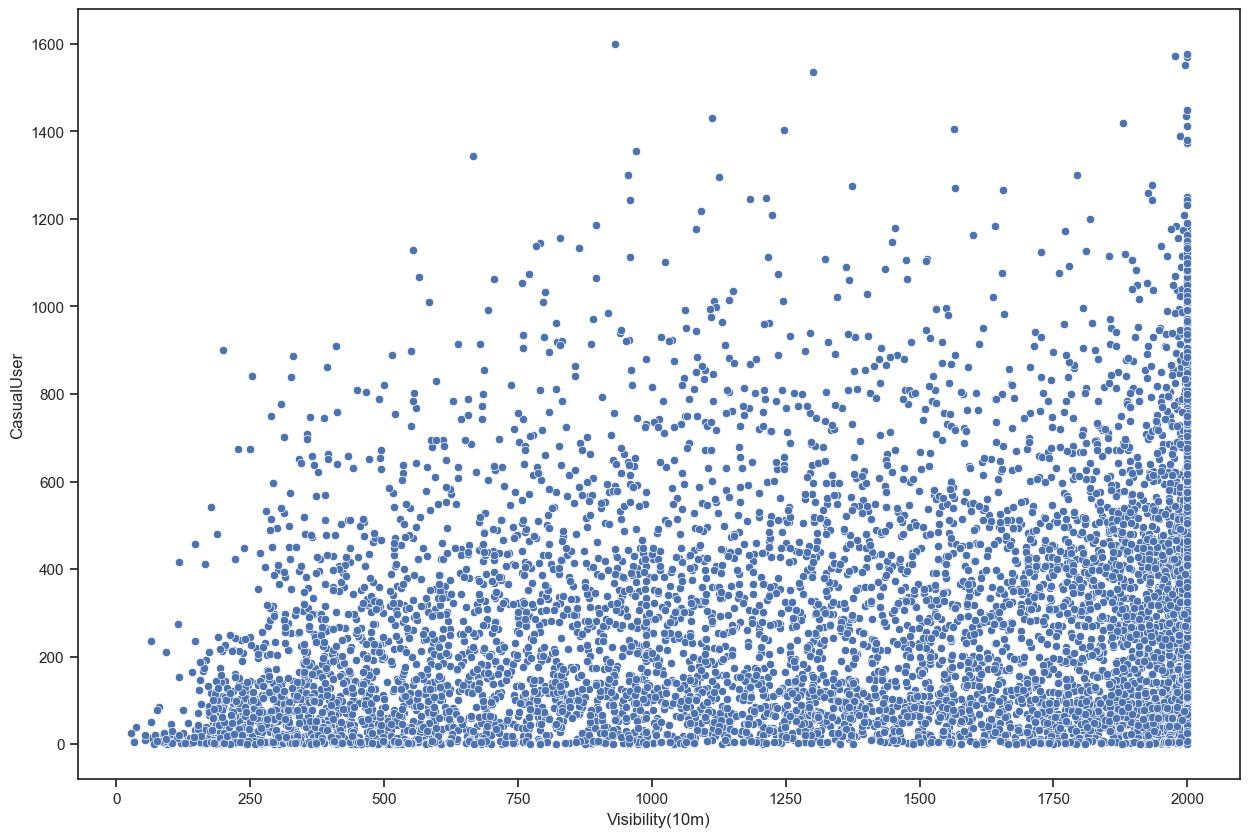

In [28]:
sns.scatterplot(x="Visibility(10m)", y="CasualUser", data=df);

### Discussion:
****
`Visibility` and `CasualUser` have a weak positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: 0.190.

### Correlation between `Dewpointtemperature` and `CasualUser`?
*****
**Hypotheses:**:
> * **Null hypothesis ($H_0$)** : `DewPointTemperature` and `CasualUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `DewPointTemperature` and `CasualUser` are correlated.

**Significance level** = 0.05

In [29]:
pearsonr(df['CasualUser'], df['Dewpointtemperature(°C)'])

PearsonRResult(statistic=0.3802281065991298, pvalue=5.223466154093668e-299)

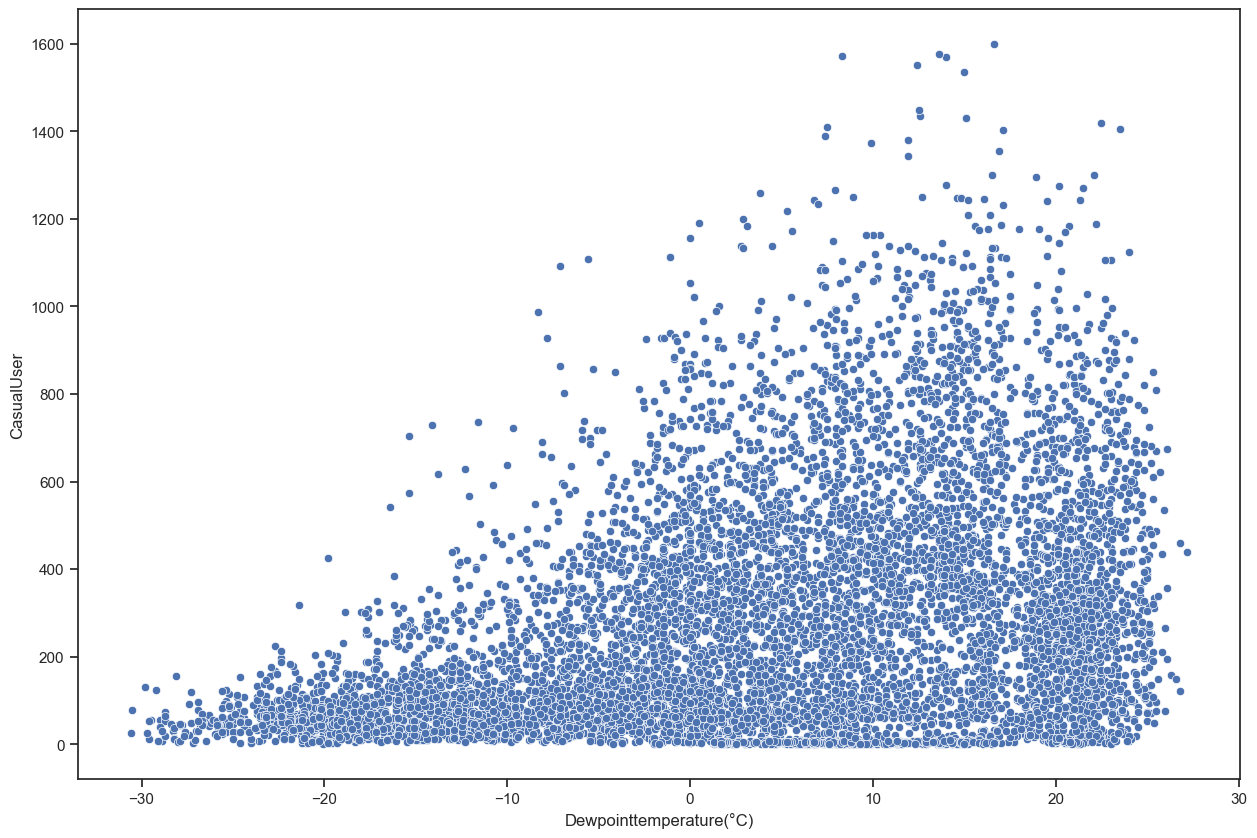

In [30]:
sns.scatterplot(x="Dewpointtemperature(°C)", y="CasualUser", data=df);

### Discussion:
****
`Dewpointtemperature` and `CasualUser` have a moderate positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is medium: 0.380.

### Correlation between `SolarRadiation` and `CasualUser`?
*****
**Hypotheses:**:
> * **Null hypothesis ($H_0$)** : `SolarRadiation` and `CasualUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `SolarRadiation`and `CasualUser` are correlated.

**Significance level** = 0.05

In [31]:
pearsonr(df['CasualUser'], df['SolarRadiation(MJ/m2)'])

PearsonRResult(statistic=0.2587352988354074, pvalue=7.831477573658488e-134)

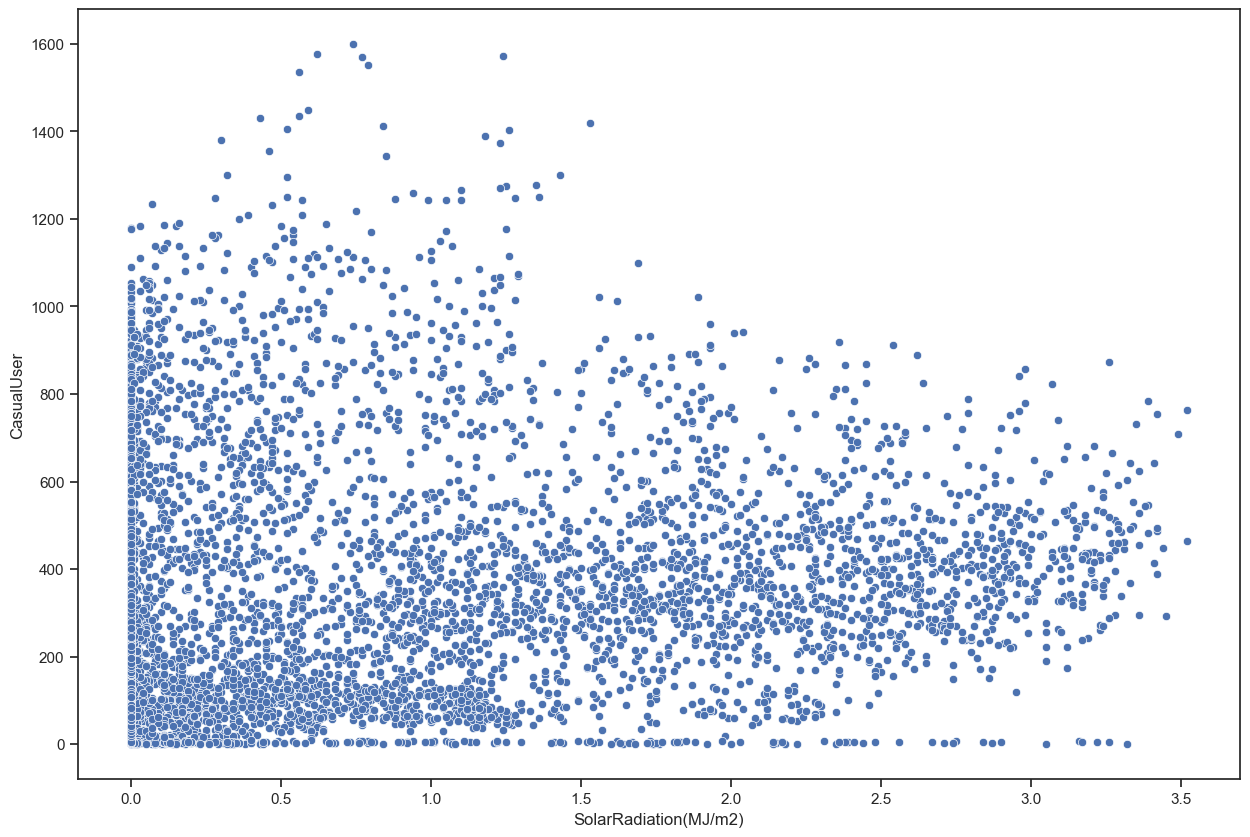

In [32]:
sns.scatterplot(x="SolarRadiation(MJ/m2)", y="CasualUser", data=df);

### Discussion:
****
`SolarRadiation` and `CasualUser` have a weak positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: 0.259.


### Correlation between `Rainfall` and `CasualUser`?
*****
**Hypotheses:**:
> * **Null hypothesis ($H_0$)** : `Rainfall` and `CasualUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Rainfall` and `CasualUser` are correlated.

**Significance level** = 0.05

In [33]:
pearsonr(df['CasualUser'], df['Rainfall(mm)'])

PearsonRResult(statistic=-0.11987884804014622, pvalue=2.2477169795338406e-29)

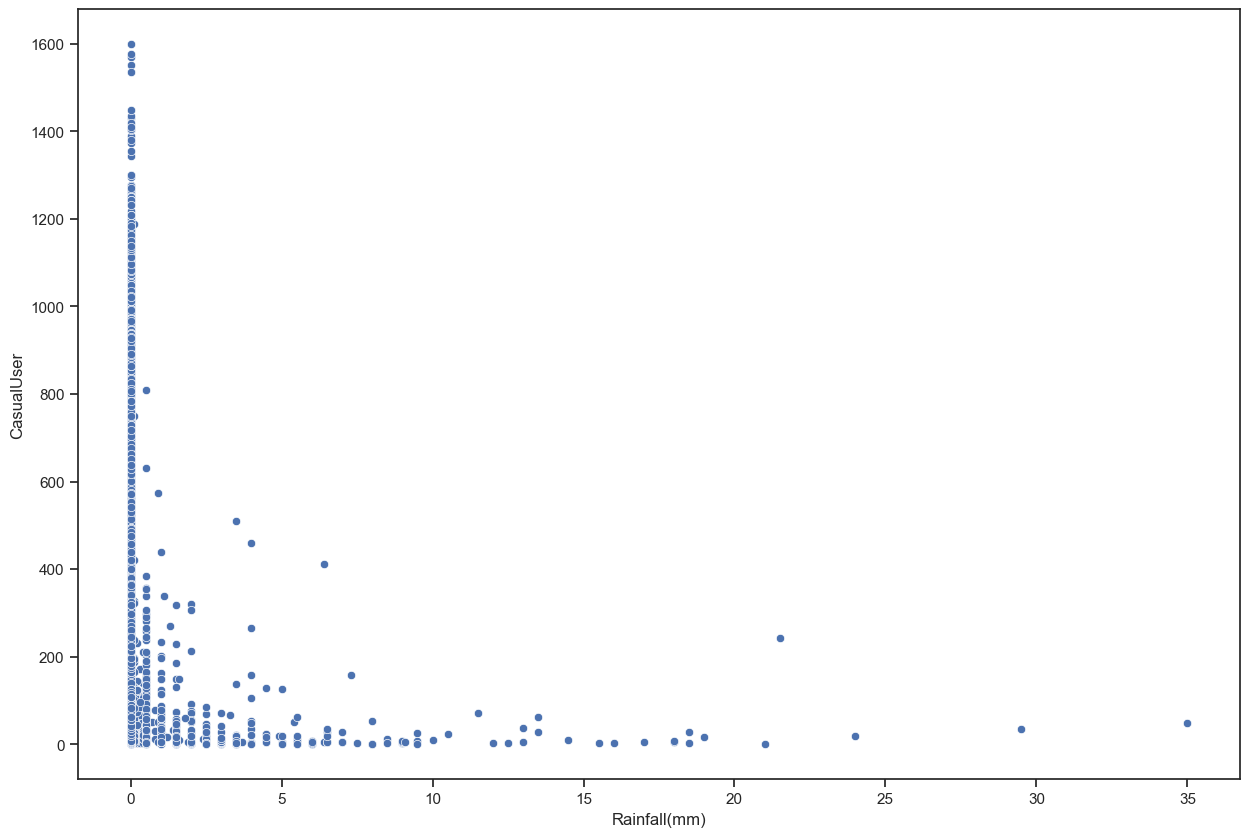

In [34]:
sns.scatterplot(x="Rainfall(mm)", y="CasualUser", data=df);

### Discussion:
****
`Rainfall` and `CasualUser` have a weak negative correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: -0.120.

From the scatterplot and the Pearson correlation test, it looks like the number of `CasualUser` decreases as `Rainfall` increases, and `CasualUser`s were more likely to rent e-scooters when there is no rain. Hence, an independent t-test is carried out to test the following hypotheses:
> * **Null hypothesis ($H_0$)** : The number of `CasualUser` on rainy days is NOT less than the number of `CasualUser` on days without rain.
> * **Alternative hypothesis ($H_1$)**: The number of `CasualUser` on rainy days is less than the number of `CasualUser` on days without rain.

**Significance level** = 0.05

A Levene's test must be conducted before the t-test to check the homogeneity of variance of the two samples: `CasualUser` on rainy days and `CasualUser` on days without rain.

In [35]:
stats.levene(df['CasualUser'][df['Rainfall(mm)'] != 0],
             df['CasualUser'][df['Rainfall(mm)'] == 0]
            )

LeveneResult(statistic=348.49931158039357, pvalue=2.697134887534971e-76)

The p-value from the Levene's test is less than the significance level (0.05), hence the test yields significant, which means that the two samples do not have equal variance.
Hence, the independent t-test must not assume equal variance between groups, and the Welch's t-test is conducted:

In [36]:
stats.ttest_ind(df['CasualUser'][df['Rainfall(mm)'] != 0], 
                df['CasualUser'][df['Rainfall(mm)'] == 0],
                equal_var=False,
                alternative='less')

Ttest_indResult(statistic=-41.07232362088277, pvalue=1.882956692417389e-216)

### Discussion:
****
The number of `CasualUser` who rented e-scooter is higher when there is no rain on a given day because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***. The number of `CasualUser` on rainy days is less than the number of `CasualUser` on days without rain is True.


### Correlation between `Snowfall` and `CasualUser`?
*****
**Hypotheses:**:
> * **Null hypothesis ($H_0$)** : `Snowfall` and `CasualUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Snowfall` and `CasualUser` are correlated.

**Significance level** = 0.05

In [37]:
pearsonr(df['CasualUser'], df['Snowfall(cm)'])

PearsonRResult(statistic=-0.13834862605927087, pvalue=1.1911094435975437e-38)

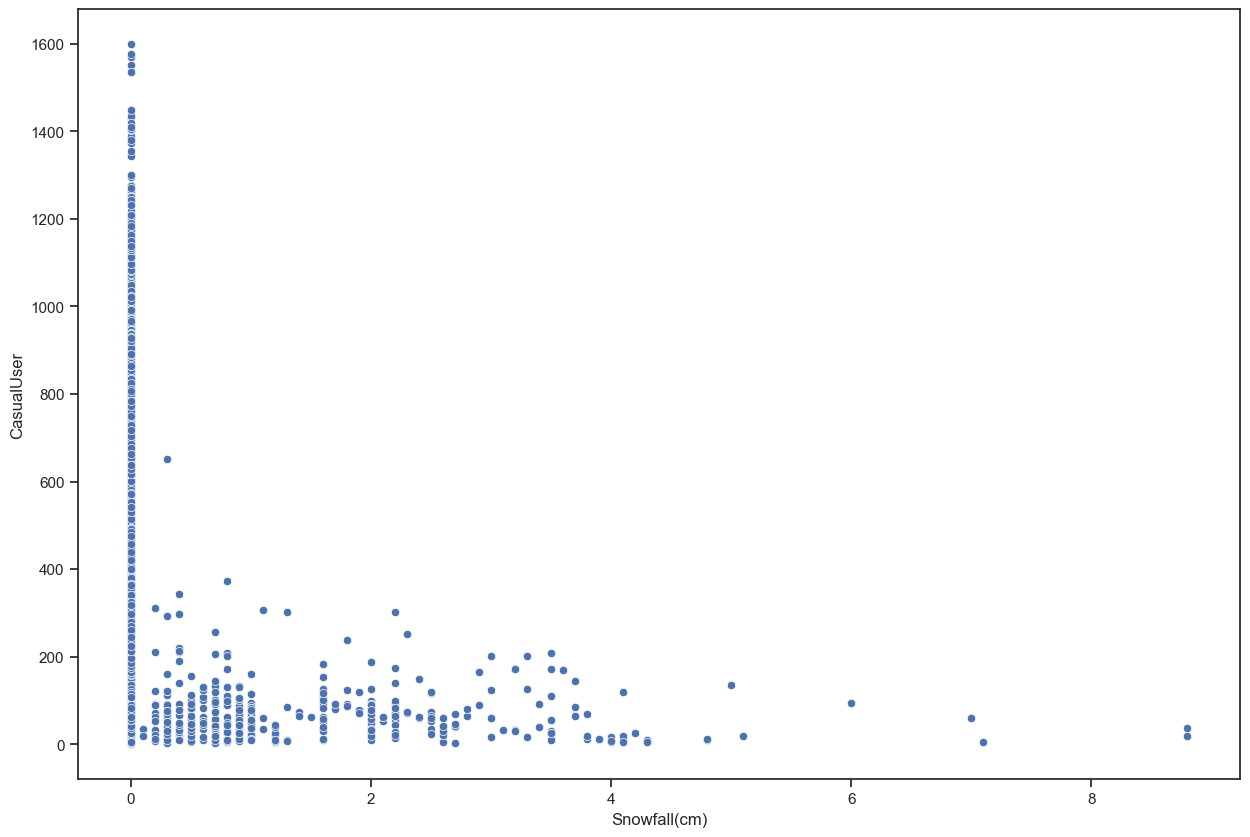

In [38]:
sns.scatterplot(x="Snowfall(cm)", y="CasualUser", data=df);

### Discussion:
****
`Snowfall` and `CasualUser` have a weak negative correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: -0.138.

From the scatterplot and the Pearson correlation test, it looks like the number of `CasualUser` decreases as `Snowfall` increases, and `CasualUser`s were more likely to rent e-scooters when there is no snow. Hence, an independent t-test is carried out to test the following hypotheses:
> * **Null hypothesis ($H_0$)** : The number of `CasualUser` on snowy days is NOT less than the number of `CasualUser` on days without snow.
> * **Alternative hypothesis ($H_1$)**: The number of `CasualUser` on snowy days is less than the number of `CasualUser` on days without snow.

**Significance level** = 0.05

A Levene's test must be conducted before the t-test to check the homogeneity of variance of the two samples: `CasualUser` on snowy days and `CasualUser` on days without snow.

In [39]:
stats.levene(df['CasualUser'][df['Snowfall(cm)'] != 0],
             df['CasualUser'][df['Snowfall(cm)'] == 0]
            )

LeveneResult(statistic=350.5818000367546, pvalue=9.8817474821936e-77)

The p-value from the Levene's test is less than the significance level (0.05), hence the test yields significant, which means that the two samples do not have equal variance.
Hence, the independent t-test must not assume equal variance between groups, and the Welch's t-test is conducted:

In [40]:
stats.ttest_ind(df['CasualUser'][df['Snowfall(cm)'] != 0], 
                df['CasualUser'][df['Snowfall(cm)'] == 0],
                equal_var=False,
                alternative='less')

Ttest_indResult(statistic=-52.10439974854604, pvalue=0.0)

### Discussion:
****
The number of `CasualUser` who rented e-scooter is higher when there is no snow on a given day because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***. The number of `CasualUser` on snowy days is less than the number of `CasualUser` on days without snow is True.


<a id="3.2.2"></a>
### 3.2.2 RQ2: Which weather factor(s) most likely affect the number of registered e-scooter rentees?
****

### Correlation between `Temperature` and `RegisteredUser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Temperature` and `RegisteredUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Temperature` and `RegisteredUser` are correlated.

**Significance level** = 0.05

In [41]:
pearsonr(df['RegisteredUser'], df['Temperature(°C)'])

PearsonRResult(statistic=0.5382031930175806, pvalue=0.0)

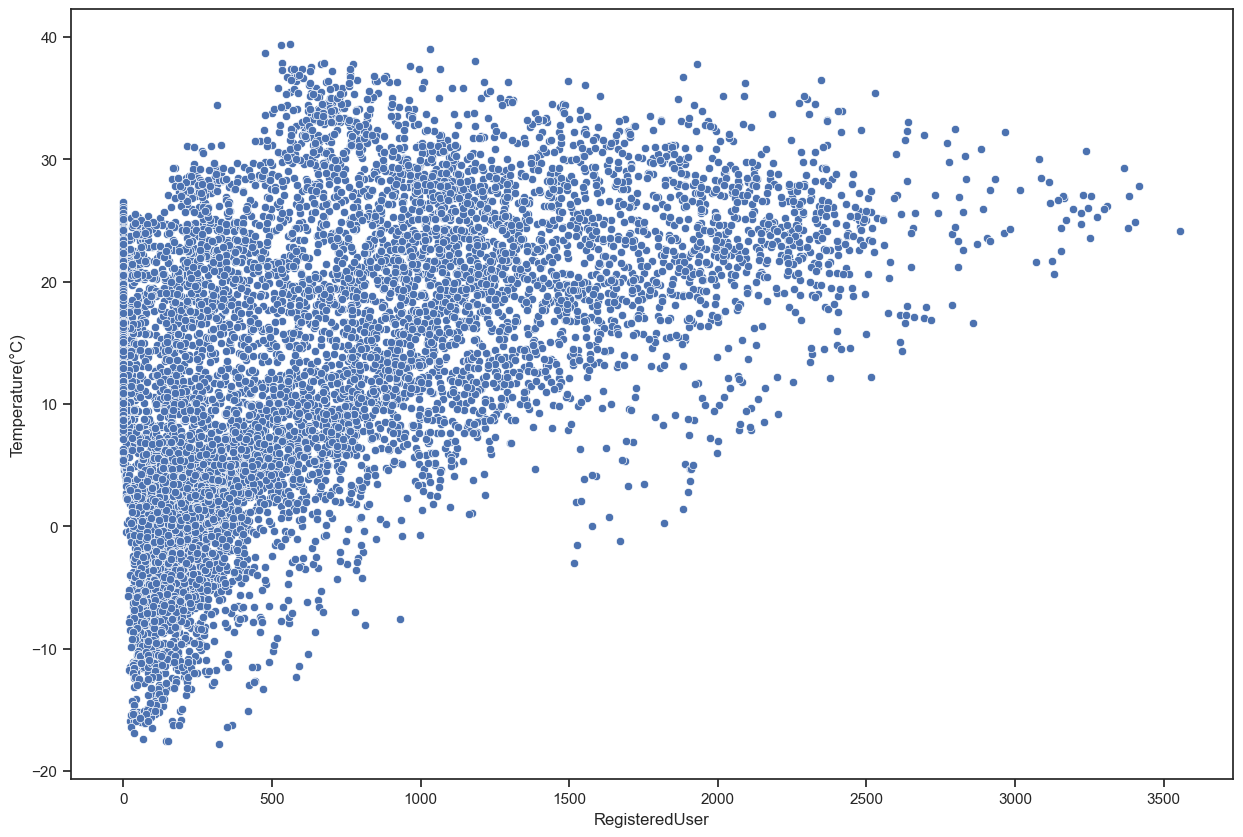

In [42]:
sns.scatterplot(x="RegisteredUser", y="Temperature(°C)", data=df);

### Discussion:
****
`Temperature` and `RegisteredUser` have a strong positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is high: 0.538.

### Correlation between `Humidity` and `RegisteredUser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Humidity` and `RegisteredUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Humidity` and `RegisteredUser` are correlated.

**Significance level** = 0.05

In [43]:
pearsonr(df['RegisteredUser'], df['Humidity(%)'])

PearsonRResult(statistic=-0.19945971467393853, pvalue=3.2457325612554766e-79)

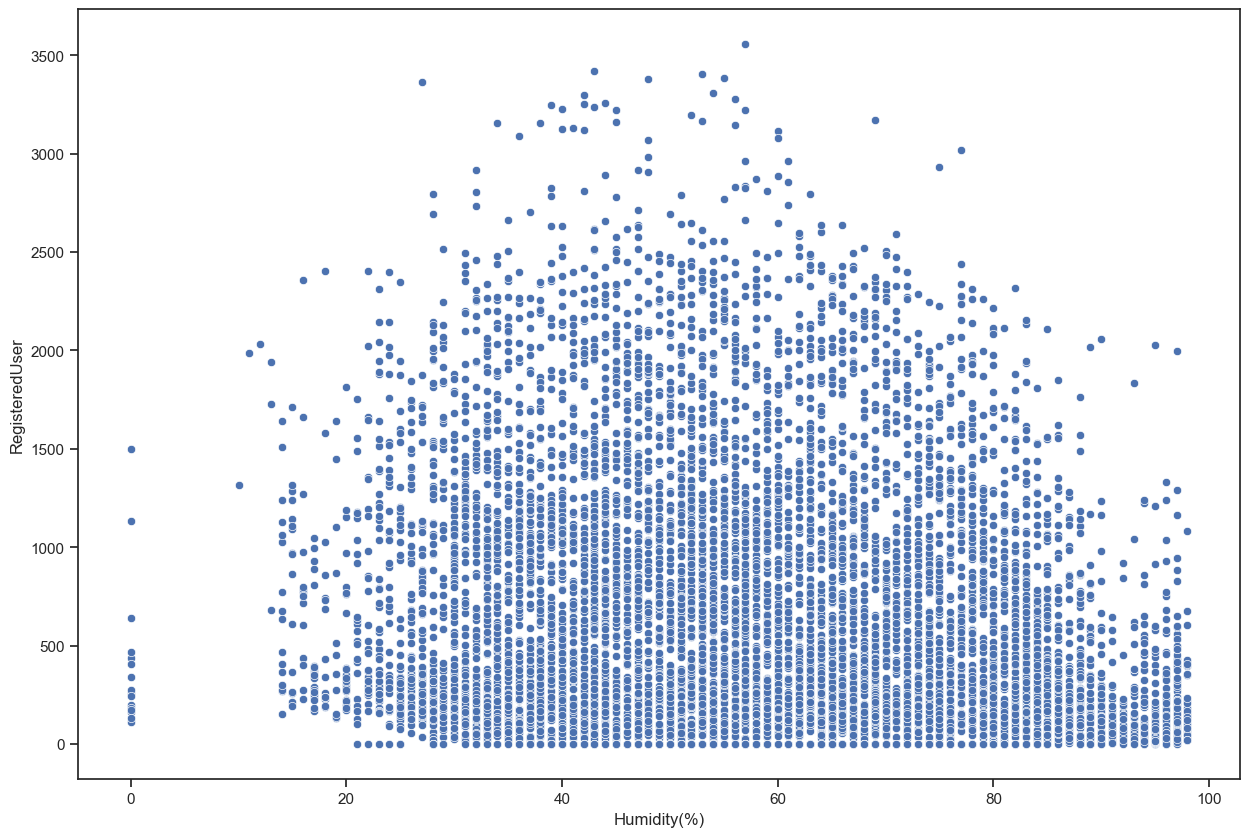

In [44]:
sns.scatterplot(x="Humidity(%)", y="RegisteredUser", data=df);

### Discussion:
****
`Humidity` and `RegisteredUser` have a weak negative correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: -0.199.

### Correlation between `Windspeed` and `RegisteredUser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Windspeed` and `RegisteredUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Windspeed` and `RegisteredUser` are correlated.

**Significance level** = 0.05

In [45]:
pearsonr(df['RegisteredUser'], df['Windspeed(m/s)'])

PearsonRResult(statistic=0.12076250166445751, pvalue=8.684165902897757e-30)

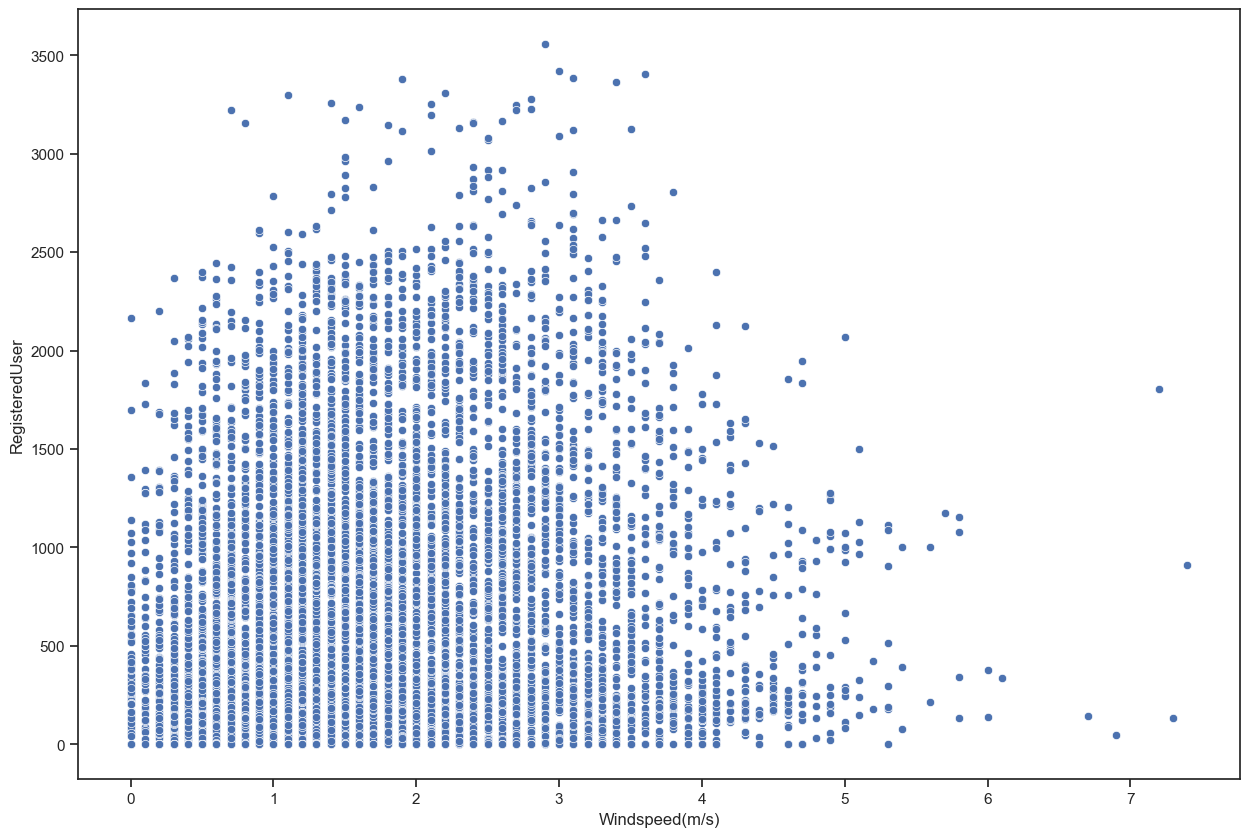

In [46]:
sns.scatterplot(x="Windspeed(m/s)", y="RegisteredUser", data=df);

### Discussion:
****
`Windspeed` and `RegisteredUser` have a weak positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: 0.121.

### Correlation between `Visibility` and `RegisteredUser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Visibility` and `RegisteredUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Visibility` and `RegisteredUser` are correlated.

**Significance level** = 0.05

In [47]:
pearsonr(df['RegisteredUser'], df['Visibility(10m)'])

PearsonRResult(statistic=0.1988861424750522, pvalue=9.215245105069735e-79)

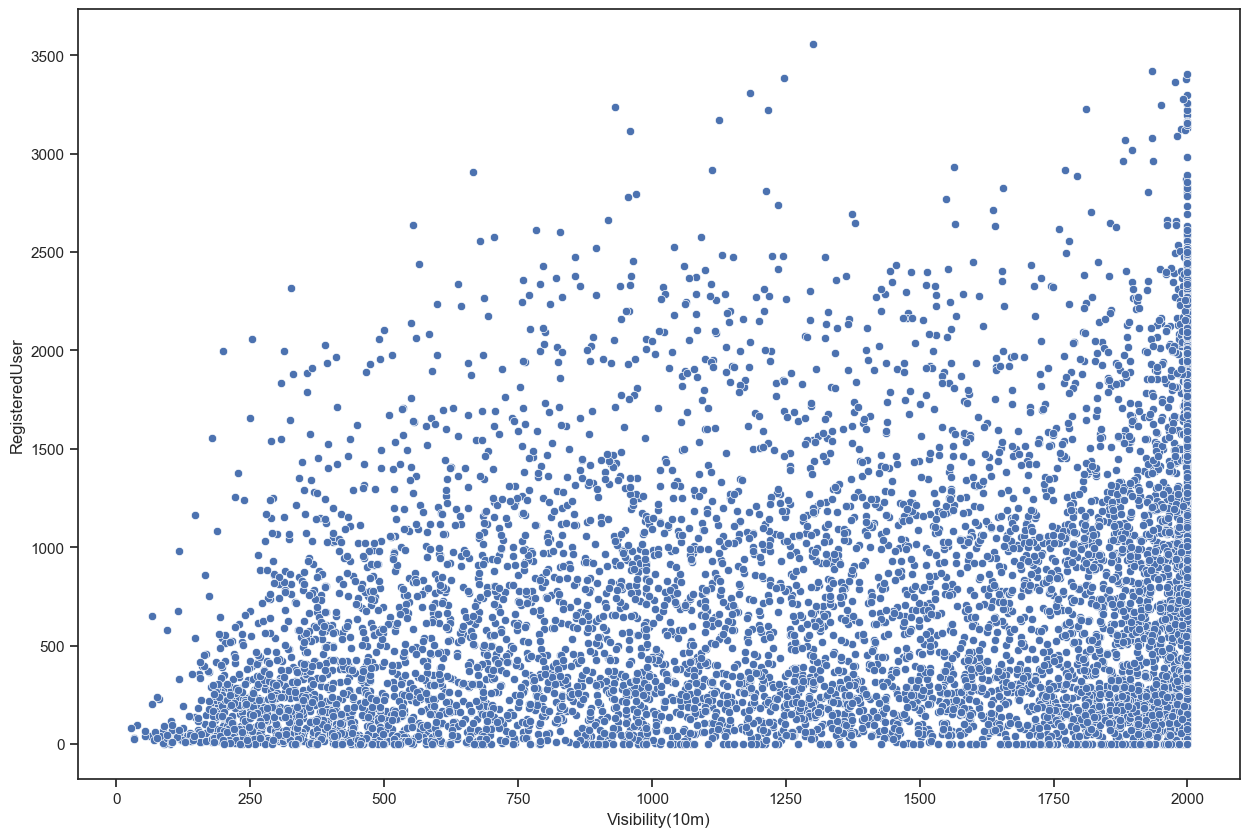

In [48]:
sns.scatterplot(x="Visibility(10m)", y="RegisteredUser", data=df);

### Discussion:
****
`Visibility` and `RegisteredUser` have a weak positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: 0.199.

### Correlation between `Dewpointtemperature` and `RegisteredUser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Dewppointtemperature` and `RegisteredUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Dewpointtemperature` and `RegisteredUser` are correlated.

**Significance level** = 0.05

In [49]:
pearsonr(df['RegisteredUser'], df['Dewpointtemperature(°C)'])

PearsonRResult(statistic=0.3794228977453784, pvalue=1.1932060481503003e-297)

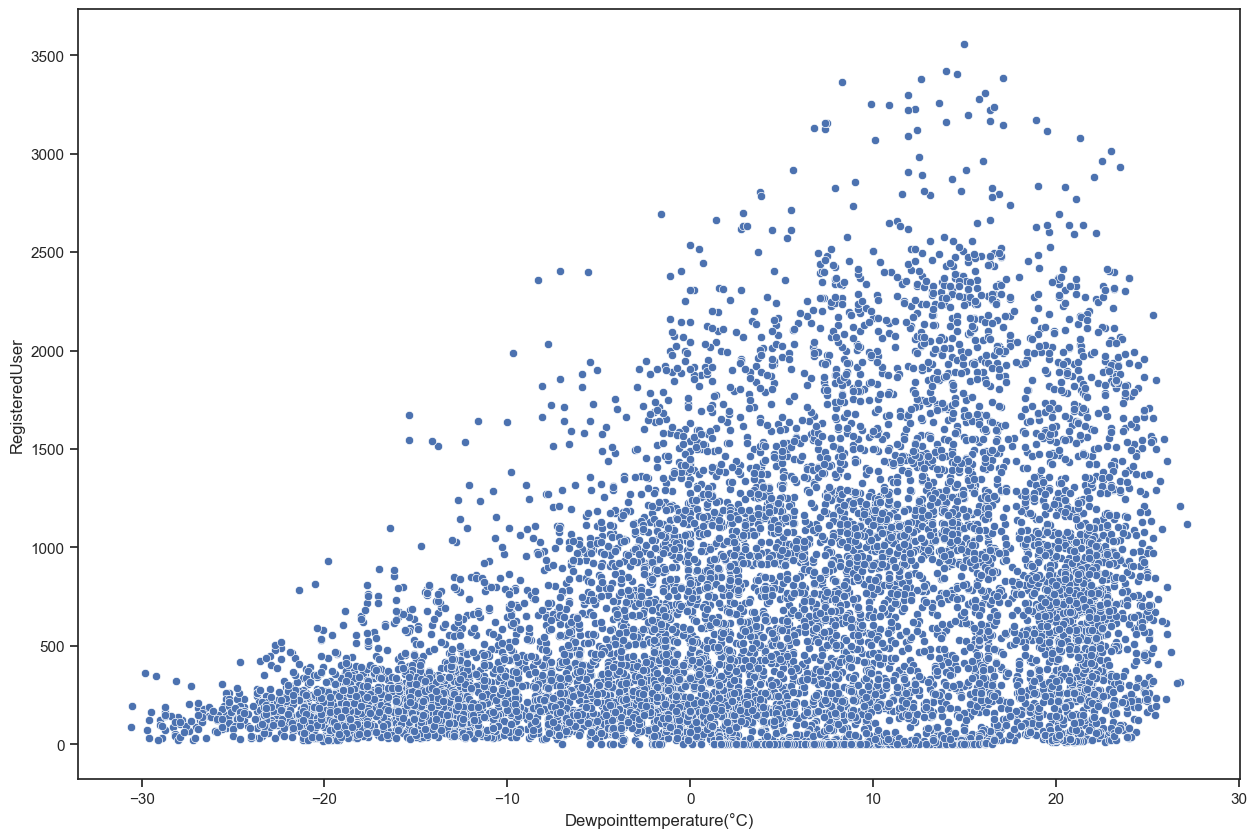

In [50]:
sns.scatterplot(x="Dewpointtemperature(°C)", y="RegisteredUser", data=df);

### Discussion:
****
`Dewpointtemperature` and `RegisteredUser` have a moderate positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is medium: 0.379.

### Correlation between `SolarRadiation` and `RegisteredUser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `SolarRadiation` and `RegisteredUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `SolarRadiation` and `RegisteredUser` are correlated.

**Significance level** = 0.05

In [51]:
pearsonr(df['RegisteredUser'], df['SolarRadiation(MJ/m2)'])

PearsonRResult(statistic=0.26152776675291417, pvalue=8.493906600086412e-137)

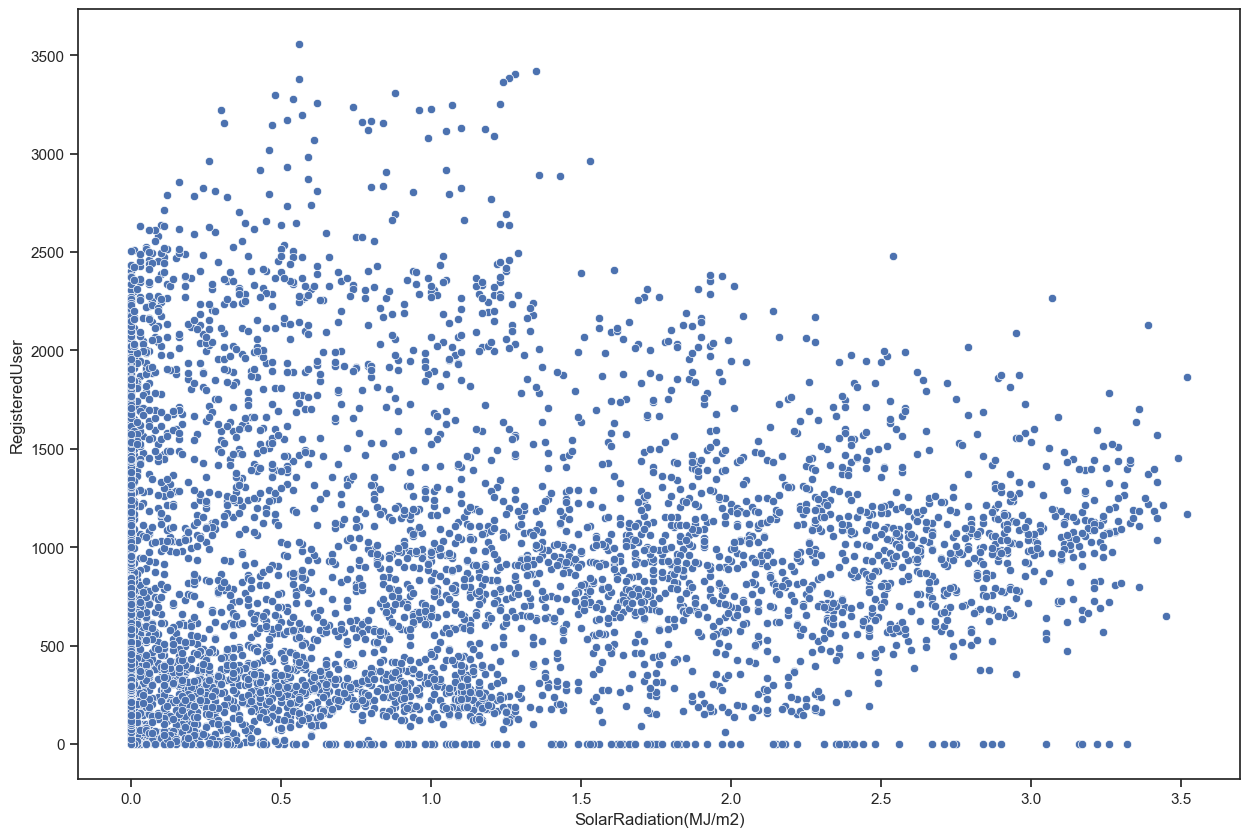

In [52]:
sns.scatterplot(x="SolarRadiation(MJ/m2)", y="RegisteredUser", data=df);

### Discussion:
****
`SolarRadiation` and `RegisteredUser` have a weak positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: 0.262.

### Correlation between `Rainfall` and `RegisteredUser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Rainfall` and `RegisteredUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Rainfall` and `RegisteredUser` are correlated.

**Significance level** = 0.05

In [53]:
pearsonr(df['RegisteredUser'], df['Rainfall(mm)'])

PearsonRResult(statistic=-0.12306264483598041, pvalue=7.066768191187448e-31)

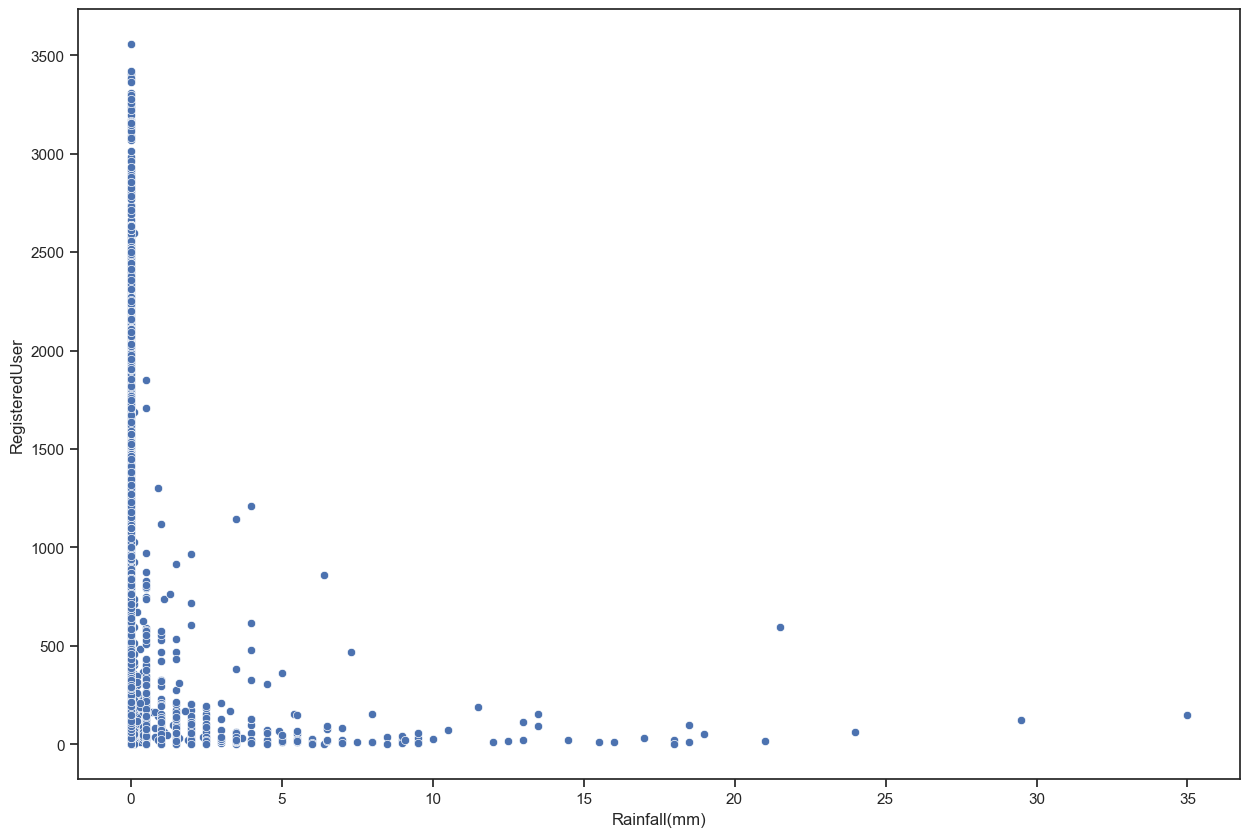

In [54]:
sns.scatterplot(x="Rainfall(mm)", y="RegisteredUser", data=df);

### Discussion:
****
`Rainfall` and `RegisteredUser` have a weak negative correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: -0.123.

From the scatterplot and the Pearson correlation test, it looks like the number of `RegisteredUser` decreases as `Rainfall` increases, and `RegisteredUser`s were more likely to rent e-scooters when there is no rain. Hence, an independent t-test is carried out to test the following hypotheses:
> * **Null hypothesis ($H_0$)** : The number of `RegisteredUser` on rainy days is NOT less than the number of `RegisteredUser` on days without rain.
> * **Alternative hypothesis ($H_1$)**: The number of `RegisteredUser` on rainy days is less than the number of `RegisteredUser` on days without rain.

**Significance level** = 0.05

A Levene's test must be conducted before the t-test to check the homogeneity of variance of the two samples: `RegisteredUser` on rainy days and `RegisteredUser` on days without rain.

In [55]:
stats.levene(df['RegisteredUser'][df['Rainfall(mm)'] != 0],
             df['RegisteredUser'][df['Rainfall(mm)'] == 0]
            )

LeveneResult(statistic=367.434118092305, pvalue=2.9506655063436008e-80)

The p-value from the Levene's test is less than the significance level (0.05), hence the test yields significant, which means that the two samples do not have equal variance.
Hence, the independent t-test must not assume equal variance between groups, and the Welch's t-test is conducted:

In [56]:
stats.ttest_ind(df['RegisteredUser'][df['Rainfall(mm)'] != 0], 
                df['RegisteredUser'][df['Rainfall(mm)'] == 0],
                equal_var=False,
                alternative='less')

Ttest_indResult(statistic=-42.77371677697413, pvalue=6.12637129969689e-229)

### Discussion:
****
The number of `RegisteredUser` who rented e-scooter is higher when there is no rain on a given day because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***. The number of `RegisteredUser` on rainy days is less than the number of `RegisteredUser` on days without rain is True.


### Correlation between `Snowfall` and `RegisteredUser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Snowfall` and `RegisteredUser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Snowfall` and `RegisteredUser` are correlated.

**Significance level** = 0.05

In [57]:
pearsonr(df['RegisteredUser'], df['Snowfall(cm)'])

PearsonRResult(statistic=-0.14068199534058526, pvalue=6.418308371232827e-40)

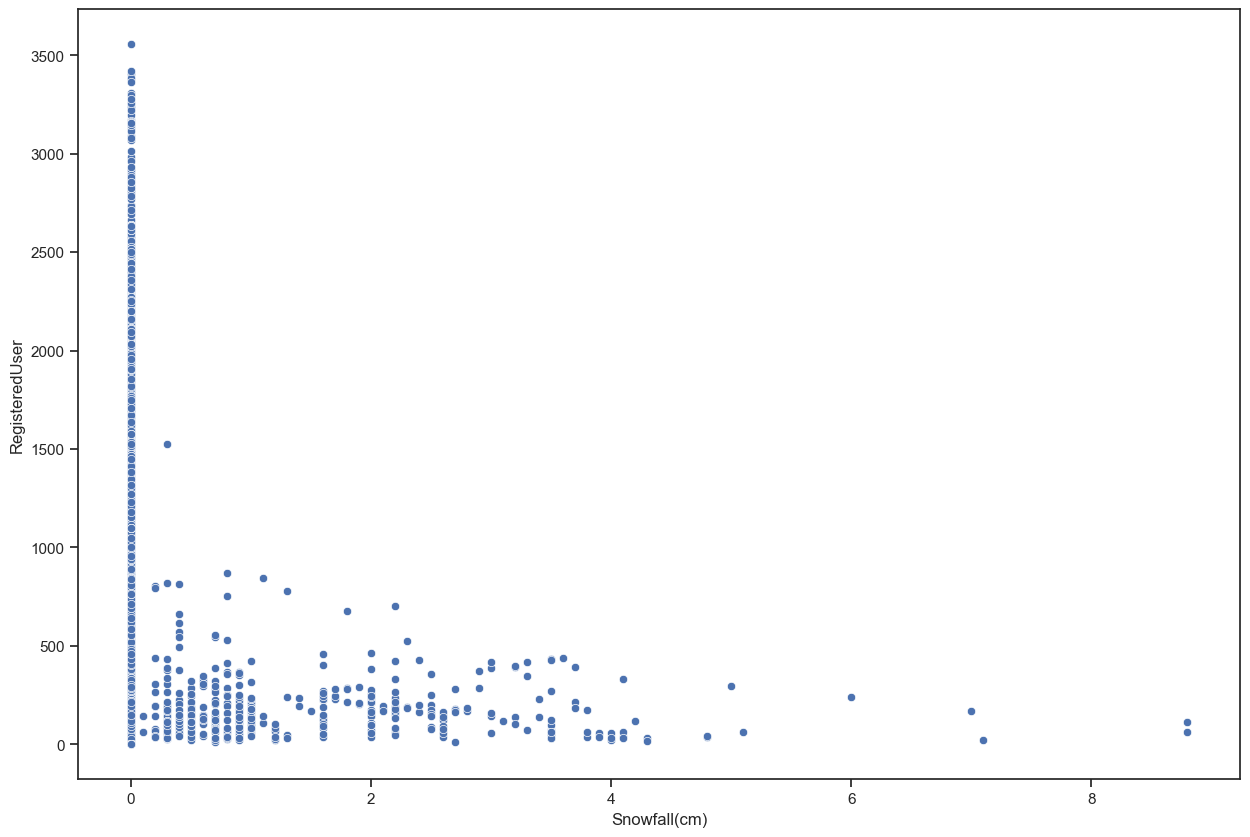

In [58]:
sns.scatterplot(x="Snowfall(cm)", y="RegisteredUser", data=df);

### Discussion:
****
`Snowfall` and `RegisteredUser` have a weak positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: -0.141.

From the scatterplot and the Pearson correlation test, it looks like the number of `RegisteredUser` decreases as `Snowfall` increases, and `RegisteredUser`s were more likely to rent e-scooters when there is no snow. Hence, an independent t-test is carried out to test the following hypotheses:
> * **Null hypothesis ($H_0$)** : The number of `RegisteredUser` on snowy days is NOT less than the number of `RegisteredUser` on days without snow.
> * **Alternative hypothesis ($H_1$)**: The number of `RegisteredUser` on snowy days is less than the number of `RegisteredUser` on days without snow.

**Significance level** = 0.05

A Levene's test must be conducted before the t-test to check the homogeneity of variance of the two samples: `RegisteredUser` on snowy days and `RegisteredUser` on days without snow.

In [59]:
stats.levene(df['RegisteredUser'][df['Snowfall(cm)'] != 0],
             df['RegisteredUser'][df['Snowfall(cm)'] == 0]
            )

LeveneResult(statistic=369.34742490974463, pvalue=1.1753399409907473e-80)

The p-value from the Levene's test is less than the significance level (0.05), hence the test yields significant, which means that the two samples do not have equal variance.
Hence, the independent t-test must not assume equal variance between groups, and the Welch's t-test is conducted:

In [60]:
stats.ttest_ind(df['RegisteredUser'][df['Snowfall(cm)'] != 0], 
                df['RegisteredUser'][df['Snowfall(cm)'] == 0],
                equal_var=False,
                alternative='less')

Ttest_indResult(statistic=-52.120778673778524, pvalue=0.0)

### Discussion:
****
The number of `RegisteredUser` who rented e-scooter is higher when there is no snow on a given day because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***. The number of `RegisteredUser` on snowy days is less than the number of `RegisteredUser` on days without snow is True.


<a id="3.2.3"></a>
### 3.2.3 RQ3: Which weather factor(s) most likely affect the number of newly-registered e-scooter rentees?
****

### Correlation between `Temperature` and `Newregistereduser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Temperature` and `Newregistereduser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Temperature` and `Newregistereduser` are correlated.

**Significance level** = 0.05

In [61]:
pearsonr(df['Newregistereduser'], df['Temperature(°C)'])

PearsonRResult(statistic=0.5221111339911906, pvalue=0.0)

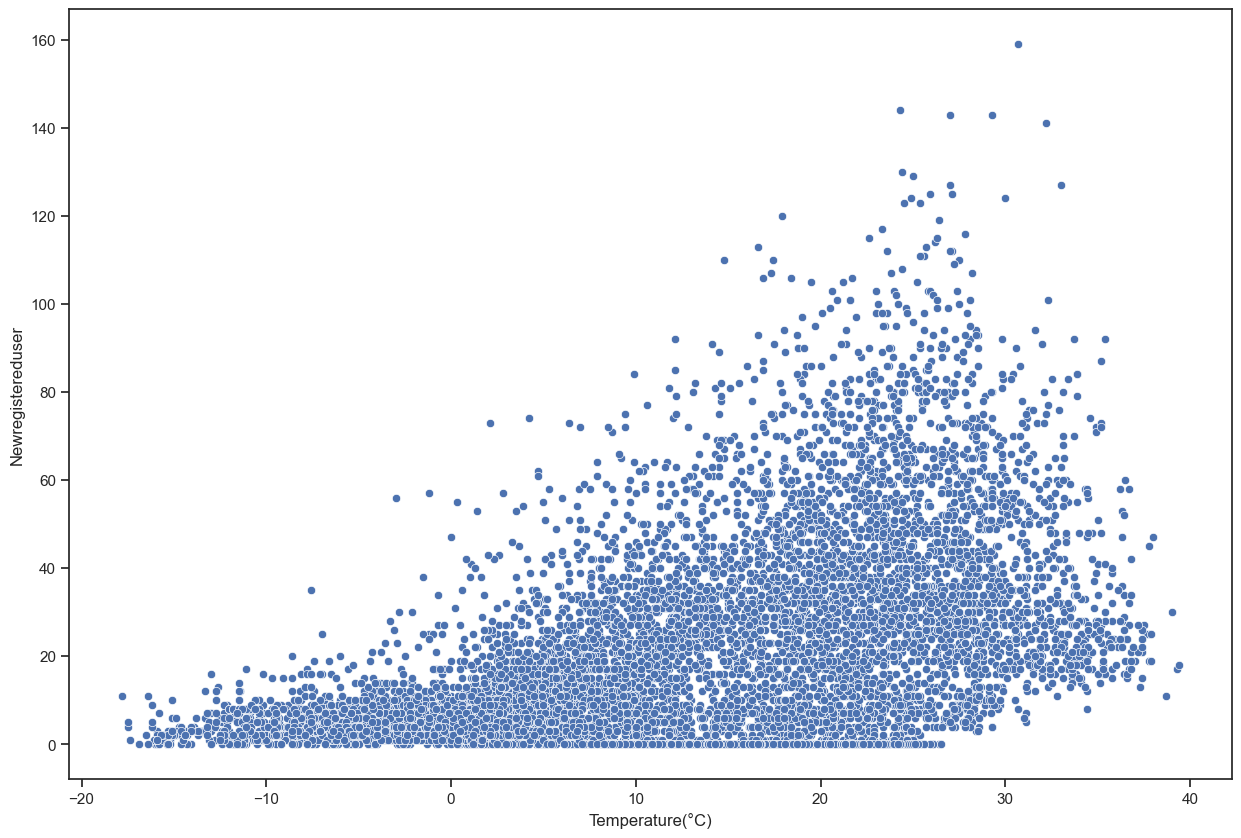

In [62]:
sns.scatterplot(x="Temperature(°C)", y="Newregistereduser", data=df);

### Discussion:
****
`Temperature` and `Newregistereduser` have a strong positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is high: 0.522.

### Correlation between `Humidity` and `Newregistereduser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Humidity` and `Newregistereduser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Humidity` and `Newregistereduser` are correlated.

**Significance level** = 0.05

In [63]:
pearsonr(df['Newregistereduser'], df['Humidity(%)'])

PearsonRResult(statistic=-0.1851074008603284, pvalue=2.7003511371263674e-68)

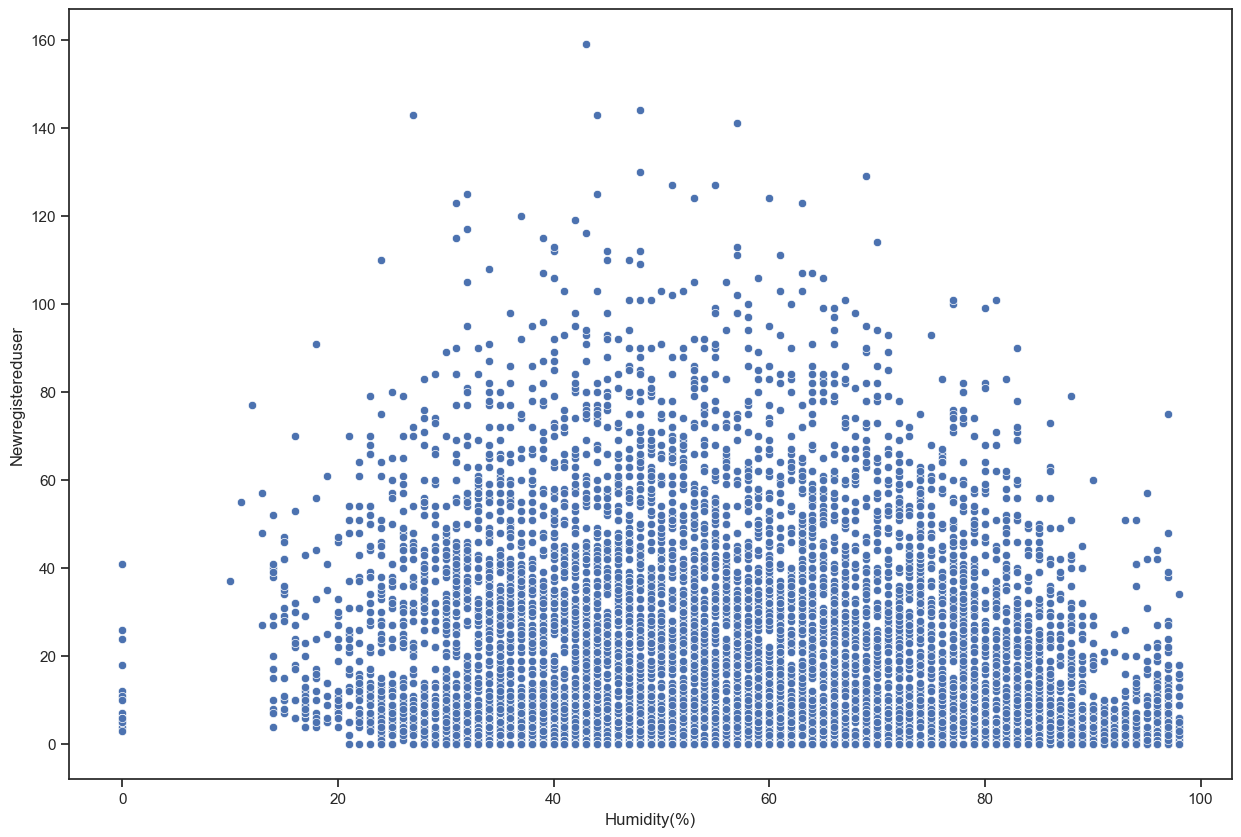

In [64]:
sns.scatterplot(x="Humidity(%)", y="Newregistereduser", data=df);

### Discussion:
****
`Humidity` and `Newregistereduser` have a weak negative correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: -0.185.

### Correlation between `Windspeed` and `Newregistereduser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Windspeed` and `Newregistereduser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Windspeed` and `Newregistereduser` are correlated.

**Significance level** = 0.05

In [65]:
pearsonr(df['Newregistereduser'], df['Windspeed(m/s)'])

PearsonRResult(statistic=0.1136015872645122, pvalue=1.57511160220153e-26)

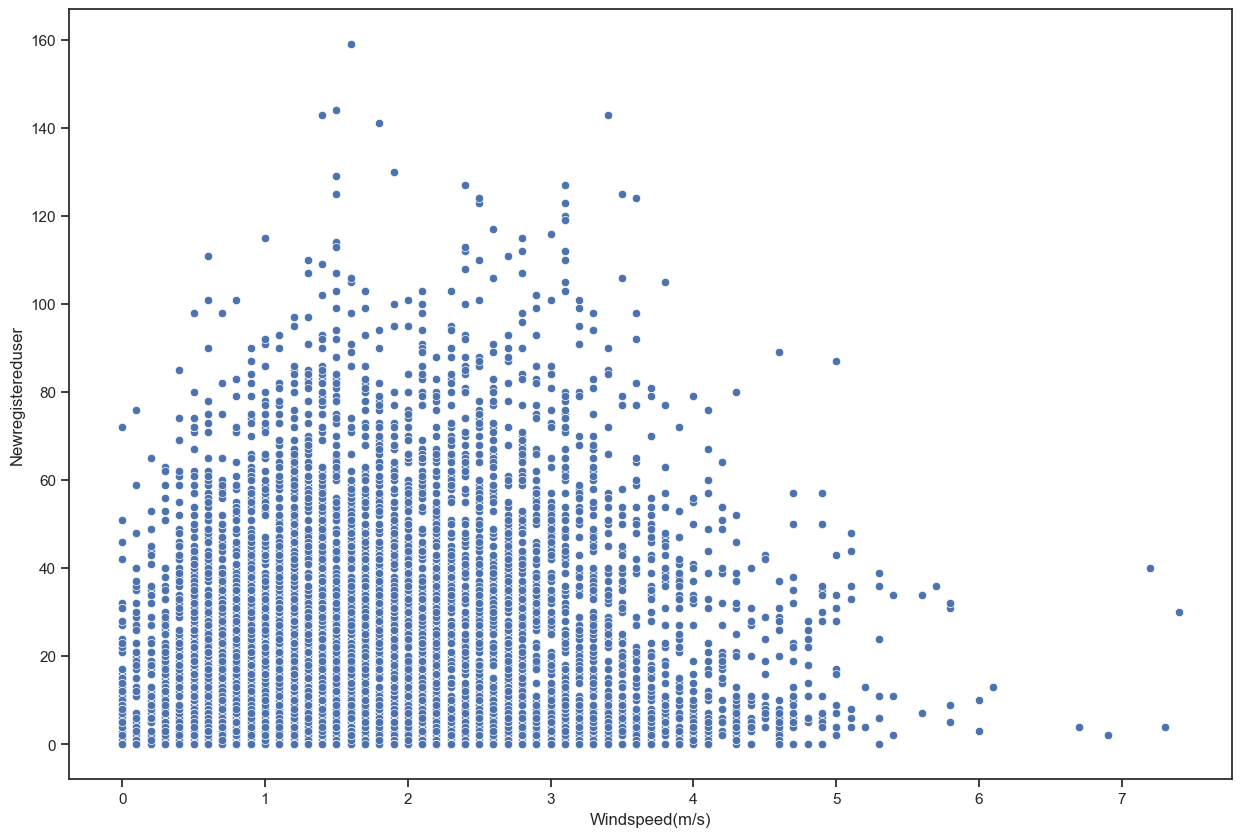

In [66]:
sns.scatterplot(x="Windspeed(m/s)", y="Newregistereduser", data=df);

### Discussion:
****
`Windspeed` and `Newregistereduser` have a weak positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: 0.114.

### Correlation between `Visibility` and `Newregistereduser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Visibility` and `Newregistereduser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Visibility` and `Newregistereduser` are correlated.

**Significance level** = 0.05

In [67]:
pearsonr(df['Newregistereduser'], df['Visibility(10m)'])

PearsonRResult(statistic=0.18584173808848492, pvalue=7.831074666582882e-69)

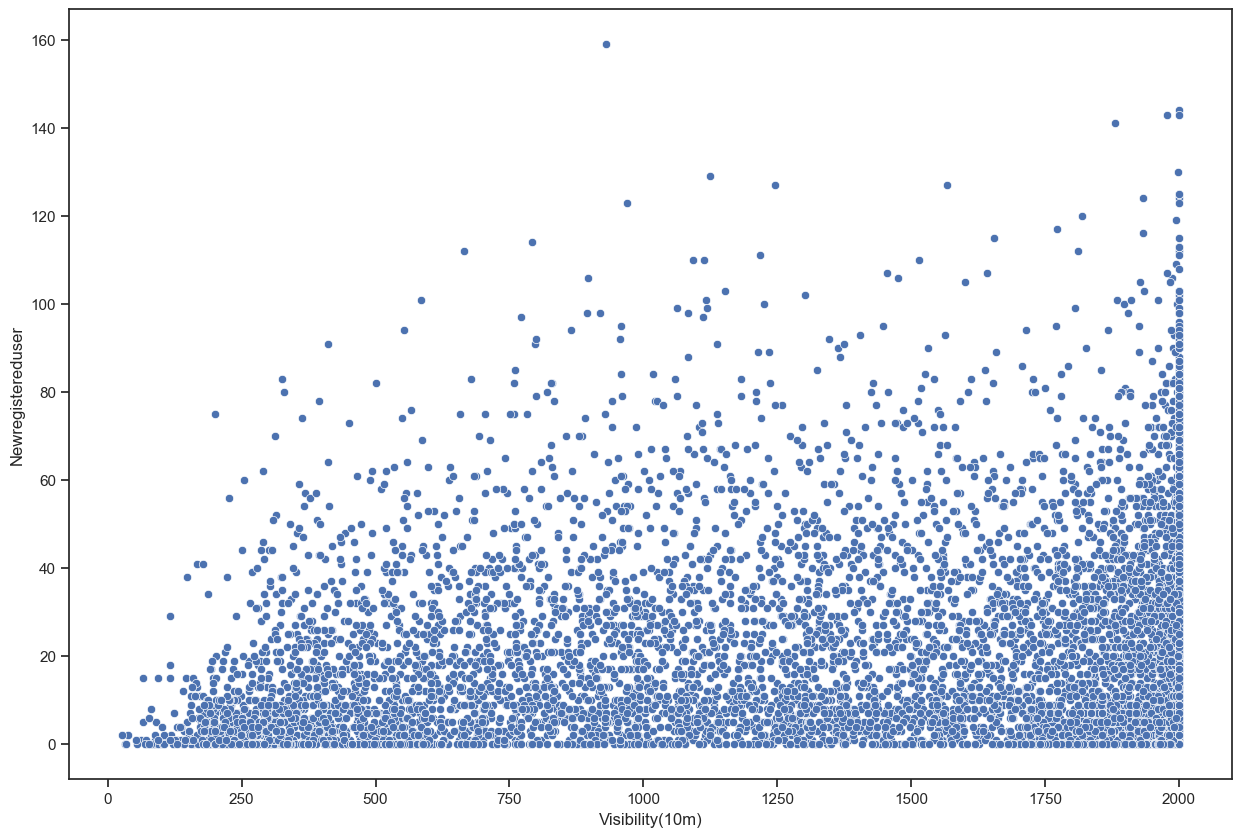

In [68]:
sns.scatterplot(x="Visibility(10m)", y="Newregistereduser", data=df);

### Discussion:
****
`Visibility` and `Newregistereduser` have a weak positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: 0.186.

### Correlation between `Dewpointtemperature` and `Newregistereduser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Dewpointtemperature` and `Newregistereduser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Dewpointtemperature` and `Newregistereduser` are correlated.

**Significance level** = 0.05

In [69]:
pearsonr(df['Newregistereduser'], df['Dewpointtemperature(°C)'])

PearsonRResult(statistic=0.3713926527067924, pvalue=2.620297590400164e-284)

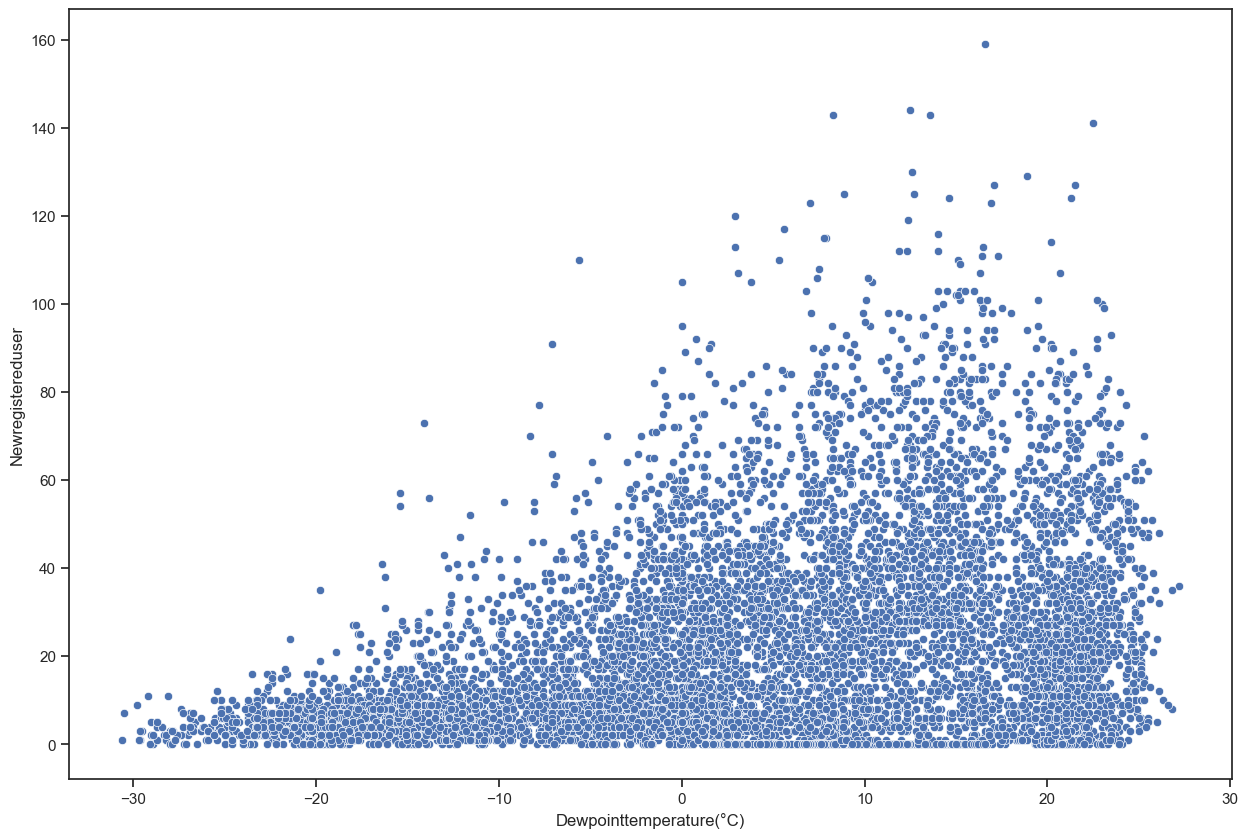

In [70]:
sns.scatterplot(x="Dewpointtemperature(°C)", y="Newregistereduser", data=df);

### Discussion:
****
`Dewpointtemperature` and `Newregistereduser` have a moderate positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is medium: 0.371.

### Correlation between `SolarRadiation` and `Newregistereduser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `SolarRadiation` and `Newregistereduser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `SolarRadiation` and `Newregistereduser` are correlated.

**Significance level** = 0.05

In [71]:
pearsonr(df['Newregistereduser'], df['SolarRadiation(MJ/m2)'])

PearsonRResult(statistic=0.2493280474482923, pvalue=4.1262260321077145e-124)

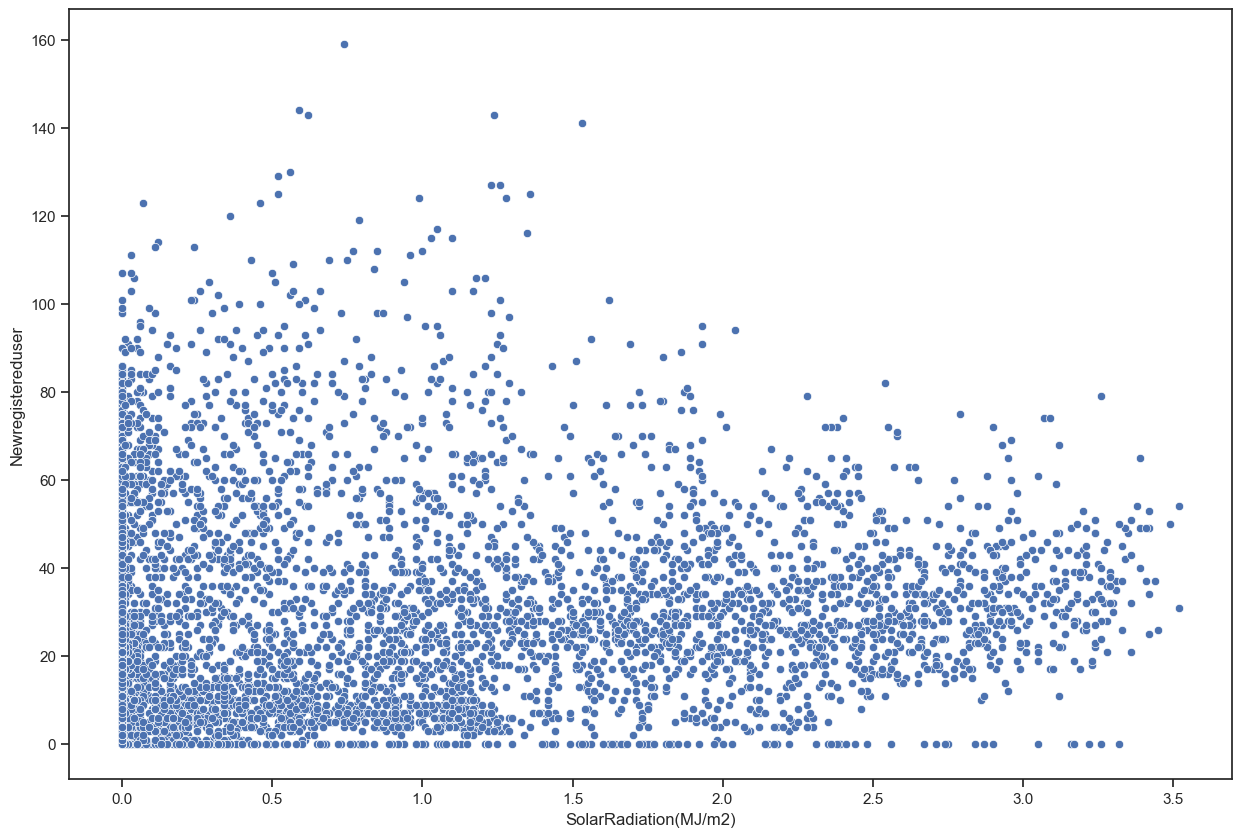

In [72]:
sns.scatterplot(x="SolarRadiation(MJ/m2)", y="Newregistereduser", data=df);

### Discussion:
****
`SolarRadiation` and `Newregistereduser` have a weak positive correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: 0.249.

### Correlation between `Rainfall` and `Newregistereduser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Rainfall` and `Newregistereduser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Rainfall` and `Newregistereduser` are correlated.

**Significance level** = 0.05

In [73]:
pearsonr(df['Newregistereduser'], df['Rainfall(mm)'])

PearsonRResult(statistic=-0.11724028041474172, pvalue=3.687218553391794e-28)

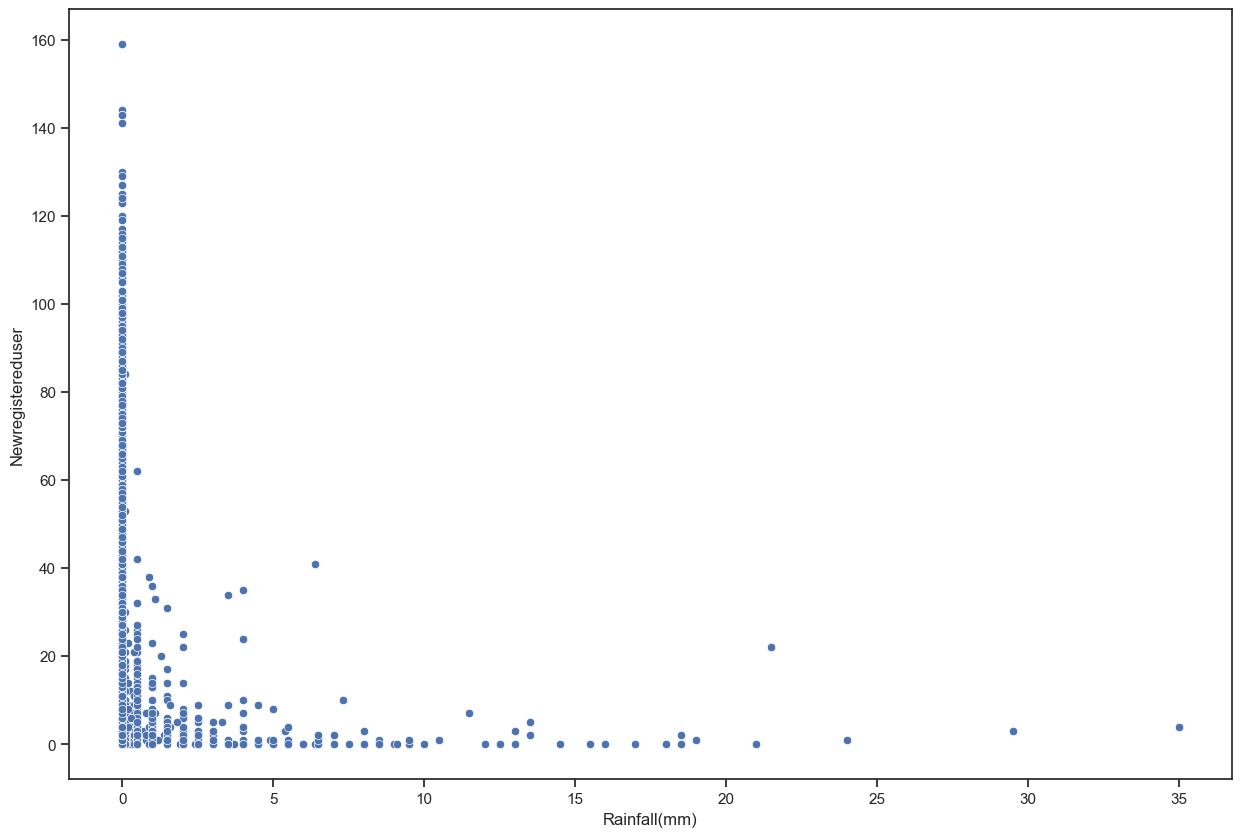

In [74]:
sns.scatterplot(x="Rainfall(mm)", y="Newregistereduser", data=df);

### Discussion:
****
`Rainfall` and `Newregistereduser` have a weak negative correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: -0.117.

From the scatterplot and the Pearson correlation test, it looks like the number of `Newregistereduser` decreases as `Rainfall` increases, and `Newregistereduser`s were more likely to rent e-scooters when there is no rain. Hence, an independent t-test is carried out to test the following hypotheses:
> * **Null hypothesis ($H_0$)** : The number of `Newregistereduser` on rainy days is NOT less than the number of `Newregistereduser` on days without rain.
> * **Alternative hypothesis ($H_1$)**: The number of `Newregistereduser` on rainy days is less than the number of `Newregistereduser` on days without rain.

**Significance level** = 0.05

A Levene's test must be conducted before the t-test to check the homogeneity of variance of the two samples: `Newregistereduser` on rainy days and `Newregistereduser` on days without rain.

In [75]:
stats.levene(df['Newregistereduser'][df['Rainfall(mm)'] != 0],
             df['Newregistereduser'][df['Rainfall(mm)'] == 0]
            )

LeveneResult(statistic=315.2109537191861, pvalue=2.606574561860484e-69)

The p-value from the Levene's test is less than the significance level (0.05), hence the test yields significant, which means that the two samples do not have equal variance.
Hence, the independent t-test must not assume equal variance between groups, and the Welch's t-test is conducted:

In [76]:
stats.ttest_ind(df['Newregistereduser'][df['Rainfall(mm)'] != 0], 
                df['Newregistereduser'][df['Rainfall(mm)'] == 0],
                equal_var=False,
                alternative='less')

Ttest_indResult(statistic=-42.54572788648157, pvalue=2.8275435831975055e-233)

### Discussion:
****
The number of `Newregistereduser` who rented e-scooter is higher when there is no rain on a given day because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***. The number of `Newregistereduser` on rainy days is less than the number of `Newregistereduser` on days without rain is True.


### Correlation between `Snowfall` and `Newregistereduser`?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : `Snowfall` and `Newregistereduser` are not correlated.
> * **Alternative hypothesis ($H_1$)**: `Snowfall` and `Newregistereduser` are correlated.

**Significance level** = 0.05

In [77]:
pearsonr(df['Newregistereduser'], df['Snowfall(cm)'])

PearsonRResult(statistic=-0.132473065918165, pvalue=1.4919822370007434e-35)

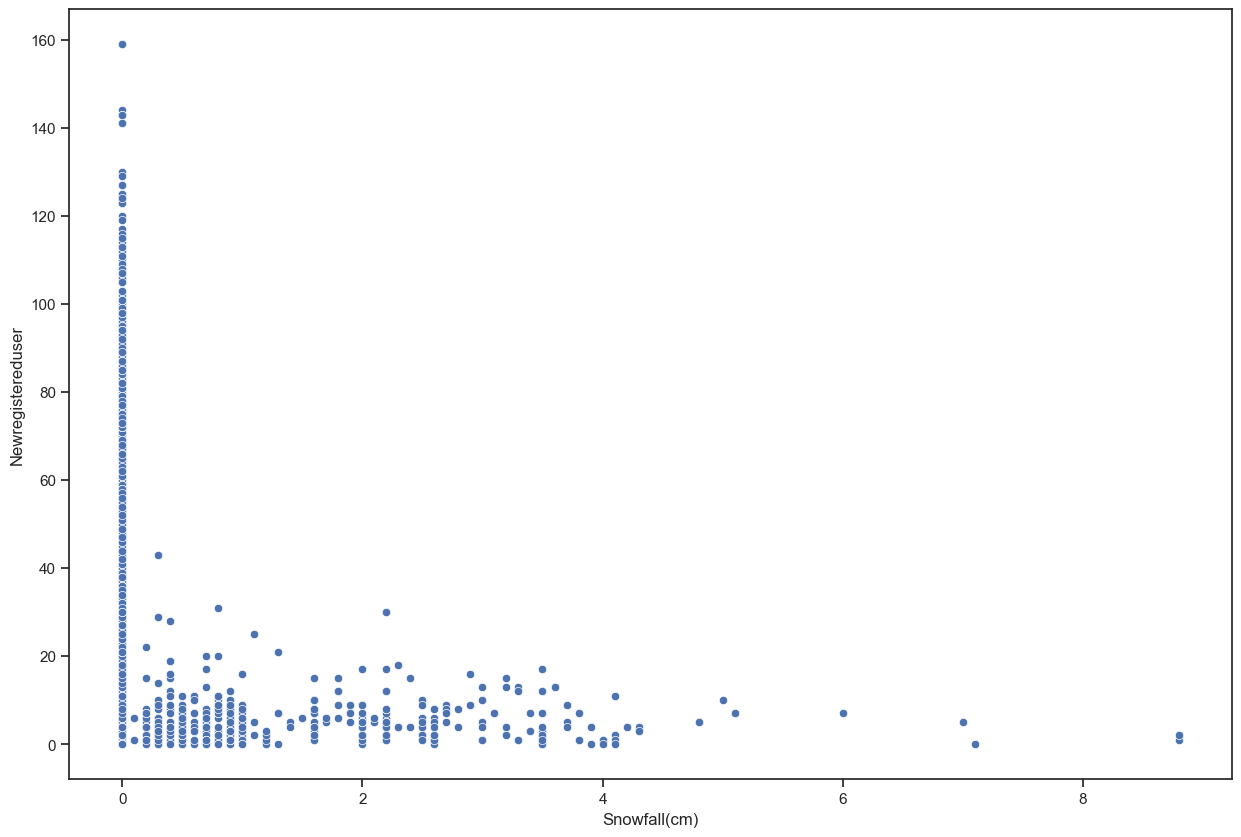

In [78]:
sns.scatterplot(x="Snowfall(cm)", y="Newregistereduser", data=df);

### Discussion:
****
`Snowfall` and `Newregistereduser` have a weak negative correlation because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***.
> - The Pearson correlation coefficient (r) is low: -0.132.

From the scatterplot and the Pearson correlation test, it looks like the number of `Newregistereduser` decreases as `Snowfall` increases, and `Newregistereduser`s were more likely to rent e-scooters when there is no snow. Hence, an independent t-test is carried out to test the following hypotheses:
> * **Null hypothesis ($H_0$)** : The number of `Newregistereduser` on snowy days is NOT less than the number of `Newregistereduser` on days without snow.
> * **Alternative hypothesis ($H_1$)**: The number of `Newregistereduser` on snowy days is less than the number of `Newregistereduser` on days without snow.

**Significance level** = 0.05

A Levene's test must be conducted before the t-test to check the homogeneity of variance of the two samples: `Newregistereduser` on snowy days and `Newregistereduser` on days without snow.

In [79]:
stats.levene(df['Newregistereduser'][df['Snowfall(cm)'] != 0],
             df['Newregistereduser'][df['Snowfall(cm)'] == 0]
            )

LeveneResult(statistic=317.59926020937155, pvalue=8.203274113197817e-70)

The p-value from the Levene's test is less than the significance level (0.05), hence the test yields significant, which means that the two samples do not have equal variance.
Hence, the independent t-test must not assume equal variance between groups, and the Welch's t-test is conducted:

In [80]:
stats.ttest_ind(df['Newregistereduser'][df['Snowfall(cm)'] != 0], 
                df['Newregistereduser'][df['Snowfall(cm)'] == 0],
                equal_var=False,
                alternative='less')

Ttest_indResult(statistic=-51.71947492261, pvalue=0.0)

### Discussion:
****
The number of `Newregistereduser` who rented e-scooter is higher when there is no snow on a given day because: 
> - p-value is lower than the ***significance level (0.05)***, therefore ***$H_0$ is REJECTED***. The number of `CasualUser` on snowy days is less than the number of `Newregistereduser` on days without snow is True.


<a id="3.2.4"></a>
### 3.2.4. RQ4/5: Which season are people most/least likely to rent an e-scooter?
****

### Levene's Test for Homogeneity of Variance

In [84]:
stats.levene(df['CasualUser'][df['Seasons'] == 'Autumn'],
             df['CasualUser'][df['Seasons'] == 'Spring'],
             df['CasualUser'][df['Seasons'] == 'Summer'],
             df['CasualUser'][df['Seasons'] == 'Winter'],
            )

LeveneResult(statistic=667.3287404466518, pvalue=0.0)

In [83]:
stats.levene(df['RegisteredUser'][df['Seasons'] == 'Autumn'],
             df['RegisteredUser'][df['Seasons'] == 'Spring'],
             df['RegisteredUser'][df['Seasons'] == 'Summer'],
             df['RegisteredUser'][df['Seasons'] == 'Winter'],
            )

LeveneResult(statistic=693.7257653886735, pvalue=0.0)

In [82]:
stats.levene(df['Newregistereduser'][df['Seasons'] == 'Autumn'],
             df['Newregistereduser'][df['Seasons'] == 'Spring'],
             df['Newregistereduser'][df['Seasons'] == 'Summer'],
             df['Newregistereduser'][df['Seasons'] == 'Winter'],
            )

LeveneResult(statistic=606.6393089512161, pvalue=0.0)

### Discussion:
****
The Levene's test null hypothesis for `CasualUser`, `RegisteredUser`, and `Newregistereduser` sorted by `Seasons` is ***REJECTED*** since the p-value is less than the significance level (0.05) and infer that at least one pair of groups has uneven variance. Therefore, the traditional ANOVA method to compare the means of four groups of different `Seasons` cannot be used. A non-parametric version of ANOVA, Welch's ANOVA will be used instead, since Welch's ANOVA does not assume homogeneity of variance between groups. The same reason applies to why Games-Howell post-hoc test is used instead of Tukey HSD.

### Which `season` are `CasualUser` most/least likely to rent an e-scooter?
*****
**Hypotheses:**
> * **Null hypothesis ($H_0$)** : The number of `CasualUser` in four seasons have the same mean.
> * **Alternative hypothesis ($H_1$)**: The number of `CasualUser` in four seasons have different means.

**Significance level** = 0.05

### CasualUser

In [86]:
pg.welch_anova(dv='CasualUser', between='Seasons', data=df)

Source  ddof1        ddof2            F  p-unc      np2
0  Seasons      3  3965.634497  1874.164849    0.0  0.21098

### Discussion:
****
The p-value from the Welch's ANOVA test is less than the significance level (0.05), therefore $H_0$ that says all seasons have the same mean is ***REJECTED***. However, the test did not point out which season is different from the others. The Games-Howell post-hoc test is conducted to see which season has a different mean.

In [87]:
pg.pairwise_gameshowell(dv='CasualUser', between='Seasons', data=df)

A       B     mean(A)     mean(B)        diff        se          T  \
0  Autumn  Spring  328.348443  292.615489   35.732954  7.912589   4.515962   
1  Autumn  Summer  328.348443  414.281703  -85.933260  8.360462 -10.278530   
2  Autumn  Winter  328.348443   80.084347  248.264096  5.844491  42.478312   
3  Spring  Summer  292.615489  414.281703 -121.666214  8.204552 -14.829111   
4  Spring  Winter  292.615489   80.084347  212.531142  5.619202  37.822303   
5  Summer  Winter  414.281703   80.084347  334.197356  6.234074  53.608180   

            df          pval    hedges  
0  4380.439372  3.828822e-05  0.136291  
1  4373.267347  0.000000e+00 -0.310020  
2  2391.682017  8.920642e-13  1.281121  
3  4362.855599  0.000000e+00 -0.446228  
4  2435.954163  0.000000e+00  1.132073  
5  2391.425039  0.000000e+00  1.604178

### RegisteredUser

In [88]:
pg.welch_anova(dv='RegisteredUser', between='Seasons', data=df)

Source  ddof1        ddof2            F  p-unc       np2
0  Seasons      3  4003.136087  1818.386943    0.0  0.209731

In [89]:
pg.pairwise_gameshowell(dv='RegisteredUser', between='Seasons', data=df)

A       B      mean(A)      mean(B)        diff         se          T  \
0  Autumn  Spring   819.597985   730.031250   89.566735  19.210470   4.662392   
1  Autumn  Summer   819.597985  1034.073370 -214.475384  20.245422 -10.593772   
2  Autumn  Winter   819.597985   225.360465  594.237520  14.304064  41.543264   
3  Spring  Summer   730.031250  1034.073370 -304.042120  19.766665 -15.381559   
4  Spring  Winter   730.031250   225.360465  504.670785  13.618009  37.059073   
5  Summer  Winter  1034.073370   225.360465  808.712904  15.042777  53.760879   

            df          pval    hedges  
0  4375.595811  1.910770e-05  0.140718  
1  4380.148515  1.112666e-12 -0.319553  
2  2418.541522  0.000000e+00  1.253030  
3  4366.308043  1.194711e-12 -0.462852  
4  2470.913623  1.734390e-12  1.109435  
5  2421.273077  0.000000e+00  1.609008

### Discussion:
****
Based on the result, the difference between Summer and Winter is the highest. Moreover, in the mean of the Summer is the highest while the Winter is the lowest. Since then, Summer has the most user, while the Winter has the least consumers

### Newregistereduser

In [90]:
pg.welch_anova(dv='Newregistereduser', between='Seasons', data=df)

Source  ddof1        ddof2            F  p-unc       np2
0  Seasons      3  3957.371389  1716.829205    0.0  0.198307

In [91]:
pg.pairwise_gameshowell(dv='Newregistereduser', between='Seasons', data=df)

A       B    mean(A)    mean(B)       diff        se          T  \
0  Autumn  Spring  26.215659  23.367301   2.848359  0.656341   4.339755   
1  Autumn  Summer  26.215659  33.479167  -7.263507  0.702172 -10.344344   
2  Autumn  Winter  26.215659   6.445116  19.770543  0.482379  40.985507   
3  Spring  Summer  23.367301  33.479167 -10.111866  0.692534 -14.601249   
4  Spring  Winter  23.367301   6.445116  16.922184  0.468239  36.140051   
5  Summer  Winter  33.479167   6.445116  27.034050  0.530575  50.952368   

            df          pval    hedges  
0  4384.104717  8.594200e-05  0.130966  
1  4351.911771  0.000000e+00 -0.311951  
2  2390.351265  2.255973e-13  1.236094  
3  4340.843287  1.597611e-13 -0.439371  
4  2429.991148  0.000000e+00  1.081686  
5  2378.957593  0.000000e+00  1.524601

### Discussion:
****
Based on the result, the difference between Summer and Winter is the highest. Moreover, in the mean of the Summer is the highest while the Winter is the lowest. Since then, Summer has the most user, while the Winter has the least consumers

<a id="3.2.5"></a>
### 3.2.5.  RQ6/7: Which station has the most/least e-scooter rent in a single day?
****

In [98]:
stats.levene(df['CasualUser'][df['StationNumber'] == 1],
             df['CasualUser'][df['StationNumber'] == 2],
             df['CasualUser'][df['StationNumber'] == 3],
             df['CasualUser'][df['StationNumber'] == 4],
             df['CasualUser'][df['StationNumber'] == 5],
             df['CasualUser'][df['StationNumber'] == 6],
             df['CasualUser'][df['StationNumber'] == 7],
             df['CasualUser'][df['StationNumber'] == 8],
             df['CasualUser'][df['StationNumber'] == 9],
             df['CasualUser'][df['StationNumber'] == 10],
             df['CasualUser'][df['StationNumber'] == 11],
             df['CasualUser'][df['StationNumber'] == 12],
             df['CasualUser'][df['StationNumber'] == 13],
             df['CasualUser'][df['StationNumber'] == 14],
             df['CasualUser'][df['StationNumber'] == 15],
             df['CasualUser'][df['StationNumber'] == 16],
             df['CasualUser'][df['StationNumber'] == 17],
             df['CasualUser'][df['StationNumber'] == 18],
             df['CasualUser'][df['StationNumber'] == 19],
             df['CasualUser'][df['StationNumber'] == 20],
             df['CasualUser'][df['StationNumber'] == 21],
             df['CasualUser'][df['StationNumber'] == 22],
             df['CasualUser'][df['StationNumber'] == 23],
             df['CasualUser'][df['StationNumber'] == 24],
            )

LeveneResult(statistic=234.18677643626984, pvalue=0.0)

In [97]:
stats.levene(df['RegisteredUser'][df['StationNumber'] == 1],
             df['RegisteredUser'][df['StationNumber'] == 2],
             df['RegisteredUser'][df['StationNumber'] == 3],
             df['RegisteredUser'][df['StationNumber'] == 4],
             df['RegisteredUser'][df['StationNumber'] == 5],
             df['RegisteredUser'][df['StationNumber'] == 6],
             df['RegisteredUser'][df['StationNumber'] == 7],
             df['RegisteredUser'][df['StationNumber'] == 8],
             df['RegisteredUser'][df['StationNumber'] == 9],
             df['RegisteredUser'][df['StationNumber'] == 10],
             df['RegisteredUser'][df['StationNumber'] == 11],
             df['RegisteredUser'][df['StationNumber'] == 12],
             df['RegisteredUser'][df['StationNumber'] == 13],
             df['RegisteredUser'][df['StationNumber'] == 14],
             df['RegisteredUser'][df['StationNumber'] == 15],
             df['RegisteredUser'][df['StationNumber'] == 16],
             df['RegisteredUser'][df['StationNumber'] == 17],
             df['RegisteredUser'][df['StationNumber'] == 18],
             df['RegisteredUser'][df['StationNumber'] == 19],
             df['RegisteredUser'][df['StationNumber'] == 20],
             df['RegisteredUser'][df['StationNumber'] == 21],
             df['RegisteredUser'][df['StationNumber'] == 22],
             df['RegisteredUser'][df['StationNumber'] == 23],
             df['RegisteredUser'][df['StationNumber'] == 24],
            )

LeveneResult(statistic=256.95660352164174, pvalue=0.0)

In [99]:
stats.levene(df['Newregistereduser'][df['StationNumber'] == 1],
             df['Newregistereduser'][df['StationNumber'] == 2],
             df['Newregistereduser'][df['StationNumber'] == 3],
             df['Newregistereduser'][df['StationNumber'] == 4],
             df['Newregistereduser'][df['StationNumber'] == 5],
             df['Newregistereduser'][df['StationNumber'] == 6],
             df['Newregistereduser'][df['StationNumber'] == 7],
             df['Newregistereduser'][df['StationNumber'] == 8],
             df['Newregistereduser'][df['StationNumber'] == 9],
             df['Newregistereduser'][df['StationNumber'] == 10],
             df['Newregistereduser'][df['StationNumber'] == 11],
             df['Newregistereduser'][df['StationNumber'] == 12],
             df['Newregistereduser'][df['StationNumber'] == 13],
             df['Newregistereduser'][df['StationNumber'] == 14],
             df['Newregistereduser'][df['StationNumber'] == 15],
             df['Newregistereduser'][df['StationNumber'] == 16],
             df['Newregistereduser'][df['StationNumber'] == 17],
             df['Newregistereduser'][df['StationNumber'] == 18],
             df['Newregistereduser'][df['StationNumber'] == 19],
             df['Newregistereduser'][df['StationNumber'] == 20],
             df['Newregistereduser'][df['StationNumber'] == 21],
             df['Newregistereduser'][df['StationNumber'] == 22],
             df['Newregistereduser'][df['StationNumber'] == 23],
             df['Newregistereduser'][df['StationNumber'] == 24],
            )

LeveneResult(statistic=207.26842513488552, pvalue=0.0)

### Discussion:
****
Based on the result, the p-value is not less than .05. This means we would fail to reject the null hypothesis. In other words, the three groups have equal variances

### What is the relationship between `StationNumber` and `CasualUser`?
**The Null Hypothesis ($H_0$) and Alternative Hypothesis ($H_1$)**:
> * The **Null hypothesis ($H_0$)** : `StationNumber` and `CasualUser` have no relationship
> *  An **Alternative hypothesis ($H_1$)**: `StationNumber` and `CasualUser` have a relationship

**Significance level** = 0.05

In [93]:
crosstab = pd.crosstab(df['StationNumber'], df['CasualUser'])
stats.chi2_contingency(crosstab)

(37576.90997415585,
 1.1380940707435818e-59,
 33212,
 array([[0.66377143, 3.23588571, 0.04148571, ..., 0.04148571, 0.04148571,
         0.04148571],
        [0.66742857, 3.25371429, 0.04171429, ..., 0.04171429, 0.04171429,
         0.04171429],
        [0.66742857, 3.25371429, 0.04171429, ..., 0.04171429, 0.04171429,
         0.04171429],
        ...,
        [0.66742857, 3.25371429, 0.04171429, ..., 0.04171429, 0.04171429,
         0.04171429],
        [0.66742857, 3.25371429, 0.04171429, ..., 0.04171429, 0.04171429,
         0.04171429],
        [0.66742857, 3.25371429, 0.04171429, ..., 0.04171429, 0.04171429,
         0.04171429]]))

### Discussion:
****
There is a relationship between `StationNumber` and `CasualUser`.

### What is the relationship between `StationNumber` and `RegisteredUser`?
**The Null Hypothesis ($H_0$) and Alternative Hypothesis ($H_1$)**:
> * The **Null hypothesis ($H_0$)** : `StationNumber` and `RegisteredUser` have no relationship
> *  An **Alternative hypothesis ($H_1$)**: `StationNumber` and `RegisteredUser` have a relationship

**Significance level** = 0.05

In [94]:
crosstab = pd.crosstab(df['StationNumber'], df['RegisteredUser'])
stats.chi2_contingency(crosstab)


(53781.57116160118,
 1.5869056296345834e-35,
 49772,
 array([[12.23828571,  0.12445714,  0.08297143, ...,  0.04148571,
          0.04148571,  0.04148571],
        [12.30571429,  0.12514286,  0.08342857, ...,  0.04171429,
          0.04171429,  0.04171429],
        [12.30571429,  0.12514286,  0.08342857, ...,  0.04171429,
          0.04171429,  0.04171429],
        ...,
        [12.30571429,  0.12514286,  0.08342857, ...,  0.04171429,
          0.04171429,  0.04171429],
        [12.30571429,  0.12514286,  0.08342857, ...,  0.04171429,
          0.04171429,  0.04171429],
        [12.30571429,  0.12514286,  0.08342857, ...,  0.04171429,
          0.04171429,  0.04171429]]))

### Discussion:
****
There is a relationship between `StationNumber` and `RegisteredUser`.

### What is the relationship between `StationNumber` and `Newregistereduser`?
**The Null Hypothesis ($H_0$) and Alternative Hypothesis ($H_1$)**:
> * The **Null hypothesis ($H_0$)** : `StationNumber` and `Newregistereduser` have no relationship
> *  An **Alternative hypothesis ($H_1$)**: `StationNumber` and `Newregistereduser` have a relationship

**Significance level** = 0.05

In [95]:
crosstab = pd.crosstab(df['StationNumber'], df['Newregistereduser'])
stats.chi2_contingency(crosstab)

(7630.301432444419,
 0.0,
 2944,
 array([[25.43074286, 12.57017143, 12.81908571, ...,  0.08297143,
          0.04148571,  0.04148571],
        [25.57085714, 12.63942857, 12.88971429, ...,  0.08342857,
          0.04171429,  0.04171429],
        [25.57085714, 12.63942857, 12.88971429, ...,  0.08342857,
          0.04171429,  0.04171429],
        ...,
        [25.57085714, 12.63942857, 12.88971429, ...,  0.08342857,
          0.04171429,  0.04171429],
        [25.57085714, 12.63942857, 12.88971429, ...,  0.08342857,
          0.04171429,  0.04171429],
        [25.57085714, 12.63942857, 12.88971429, ...,  0.08342857,
          0.04171429,  0.04171429]]))

### Discussion:
****
There is a relationship between `StationNumber` and `RegisteredUser`.

In [96]:
dummies = pd.get_dummies(df['StationNumber'])
dummies.head()

1   2   3   4   5   6   7   8   9   10  ...  15  16  17  18  19  20  21  \
0   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1   0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2   0   0   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3   0   0   0   1   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4   0   0   0   0   1   0   0   0   0   0  ...   0   0   0   0   0   0   0   

   22  23  24  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 24 columns]

<a id="4"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>4. References</strong></h1>

*****

<a id="Link1"></a>
- [1] [World: Highest Temperature](https://wmo.asu.edu/content/world-highest-temperature)

<a id="Link2"></a>
- [2] [The Most Humid Cities In The World, Mapped](https://digg.com/nature/link/most-humid-cities-in-the-world-mapped-ocnm3EUU3n#:~:text=They%20scanned%20over%2018%2C000%20cities,Here's%20what%20they%20found.&text=The%20world's%20most%20humid%20city,neighboring%20countries%20Bangladesh%20and%20Myanmar.)

<a id="Link3"></a>
- [3] [Who is afraid of non-normal data? Choosing between parametric and non-parametric tests](https://eje.bioscientifica.com/view/journals/eje/182/2/EJE-19-0922.xml#:~:text=The%20t%2Dtest%20is%20not,distributions%20of%20the%20outcome%20variable.)